In [1]:
import sys
sys.path.append('/aiffel/aiffel/aiffelthon/csv')

In [8]:
# mecab 설치
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-11-18 07:26:46--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-11-18 07:26:46--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc073860d838dce03e435e74bbad.dl.dropboxusercontent.com/cd/0/get/Bw_g8PNcWSXWnaBSbODGq-uV4jFY7fRMZk0xJH05TDvfGWvxnubDUleTeu5hzix7sY3yDv5lIKXCY2Y5SzCMPgMxTs-sa_3e3alo5XEE1yhNUGZIBd9vd5EG5kvpm5xlODsXMUjAEEG5KwDqKYlBhR5GByYbthu31QjZiGitIId7H7XwVeIoDTGOYNzZFM1cbs8/file?dl=1# [following]
--2022-11-18 07:26:46--  https://uc073860d838dce03e435e74bbad.dl.dropboxusercontent.com/cd/0/get/Bw_g8PNcWSXW

In [1]:
# 한글 폰트 설치하기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)

'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [ ]:
#%cd /aiffel/aiffel/aiffelthon/csv

In [ ]:
#!unzip /aiffel/aiffel/aiffelthon/kt_data.zip

In [1]:
# 데이터처리 라이브러리 불러오기
import pandas as pd
import numpy as np
import re

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Mecab
from konlpy.tag import Mecab

In [2]:
# 데이터 불러오기'

#train = pd.read_csv('/aiffel/aiffel/aiffelthon/csv/')
#train_categori = pd.read_csv('/aiffel/aiffel/aiffelthon/csv/train_total.csv')
train = pd.read_csv('/aiffel/aiffel/aiffelthon/csv/train_total.csv')
#val = pd.read_csv('/aiffel/aiffel/aiffelthon/csv/lineby_test_val.csv')
#val_categori= pd.read_csv('/aiffel/aiffel/aiffelthon/csv/val_total.csv')
val = pd.read_csv('/aiffel/aiffel/aiffelthon/csv/val_total.csv')

In [5]:
t_ca = train_categori['Category']
v_ca = val_categori['Category']

train = pd.concat([train,t_ca], axis = 1)
val = pd.concat([val,v_ca], axis = 1)

In [3]:
print(type(train), type(val))
print(len(train), len(val))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
279992 35004


In [ ]:
# data sample 확인

train.head()

In [ ]:
val.sample(10)

# 대화문 DATA EDA

### 1. 중복 data 확인

### 2. 결측치 data 확인

### 3. Categori 분포 확인
- Categori별 count하여 개수 출력
- Categori별 자주 나오는 vocab
- Categori별 Mecab 적용 후 문장 len 확인 (전처리 전, 후로 나눔)

### 4. 라벨링된 data 확인
- LinebyLine을 사용하면 라벨링이 자동적으로 삭제된다.

### 5. emoji가 포함된 data 확인

#### 1. 중복된 데이터 검출
- df.duplicated()로 중복된 data를 확인한 결과 train['Summary']에서 58개 중복 data가 나왔다.
- 즉 대화 원문은 중복이 없지만 추상 요약 결과에서 중복이있다. 

In [ ]:
# 중복된 개수 확인
print(len(train[train['Text'].duplicated()]), len(val[val['Text'].duplicated()]))
print(len(train[train['Summary'].duplicated()]), len(val[val['Summary'].duplicated()]))

In [ ]:
# 중복데이터 중 첫 data만 출력하기
dup = train[train.duplicated(subset = 'Summary' , keep = 'first')]

In [ ]:
dup

In [ ]:
dup[dup['Summary'] == '서로 잘 자라고 인사하고 있다.']

#### 2. 결측치 data 확인
- 결측치는 존재하지 않는다.

In [ ]:
# 결측치 개수 출력
print('학습 데이터의 결측치 : ', train.isna().sum())
print('\n')
print('검증 데이터의 결측치 : ', val.isna().sum())

### 3. Category 분포 확인
- Category별 count하여 개수 출력
- Category별 자주 나오는 vocab
- Category별 문장 len 확인

#### Category별 count하여 개수 출력

In [ ]:
# Category 개수 카운트
train['Category'].value_counts()

In [ ]:
# Category 컬럼 시각화
f, ax = plt.subplots(figsize=(12, 6))
sns.barplot(train['Category'].value_counts().index,
            train['Category'].value_counts(), palette='rocket')
plt.title('Category별 data 개수', size = 20)
plt.xlabel('Category', size = 15)
plt.ylabel('Count', size = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

#### Category별 문장 len 확인

In [9]:
# 데이터 전처리 적용

def preprocess_sentence(sentence):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (..) 제거
    sentence = re.sub(r'[#@]+[가-힣A-Za-z#]+', ' ', sentence)
    sentence = re.sub(r'[ㄱ-ㅎㅏ-ㅣ]+[/ㄱ-ㅎㅏ-ㅣ]', '', sentence) # 여러개 자음과 모음을 삭제한다.
    sentence = re.sub("[^가-힣a-z0-9]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub(r'[" "]+', " ", sentence) # 여러개 공백을 하나의 공백으로 바꿉니다.
    sentence = sentence.strip() # 문장 양쪽 공백 제거

    return sentence

In [10]:
# 전체 Text 데이터에 대한 전처리 (1)
from tqdm import tqdm
clean_text = []

for s in tqdm(train['Text']):
    clean_text.append(preprocess_sentence(s))
    
train['Text'] = clean_text

100%|██████████| 279992/279992 [00:07<00:00, 38232.72it/s]


In [11]:
# 전체 headlines 데이터에 대한 전처리 
clean_headlines = []

for s in tqdm(train['Summary']):
      clean_headlines.append(preprocess_sentence(s))
        
train['Summary'] = clean_headlines

100%|██████████| 279992/279992 [00:03<00:00, 79629.61it/s]


In [51]:
# 라벨링 삭제 확인

train[train['Text'].str.contains(r'[#@]+[가-힣A-Za-z#]+')]

,Id,Text,Summary,Category


In [24]:
train.head()

,Id,Text,Summary,Category
0,fd321028-d5b4-55f7-9e20-2eaa262f9154,그럼 날짜는 가격 큰 변동 없으면 6 28 7 13로 확정할까 우리 비행포함 15일...,비행기 표 가격에 대해 이야기하며 특가 이벤트를 기다리고 있다,상거래(쇼핑)
1,c51be2e4-c8d0-5cea-b1ae-cde1fe8f8ab6,kf마스크만 5부제 하는거지 응 면마스크는 아무때나 사도될껀 면마스크말고 부직포 마...,비염이 있어서 싸게 나온 일회용 부직포 마스크를 사두려고 한다,상거래(쇼핑)
2,e90e721f-00d1-5114-aa5d-5f1061472a29,아 근데 케이크 업체들 봤는데 중앙동쪽 거기는 맛만있고 디자인은 그냥그런것같애 그러...,케이크 업체 중 중앙동 쪽은 맛만 있고 디자인은 별로고 고잔동 케이크 업체는 배달도...,상거래(쇼핑)
3,b215f3a2-d647-59f9-8410-1274ee5edd97,칫솔사야하는데 쓱으로 살까 뭘 칫솔사는것까지 물어보시남 아 그 왕칫솔 또 사려나 싶...,칫솔을 3개월에 하나씩 바꿔서 왕 칫솔 사러 신세계 가자고 했다,상거래(쇼핑)
4,0bda61b6-1396-5a2a-a049-0b4035e40d59,잠도안오네 얼릉 고구마츄 먹고싶단 그게 그렇게 맛있었어 아주 여보 빼이보릿 되버렸네...,잠도 안 와서 고구마 말랭이를 양심상 하나만 먹으려고 한다,상거래(쇼핑)


In [86]:
# Mecab 적용 후 문장 len 출력하는 함수 구현 - 전체 데이터

# 한글 데이터 Mecab 적용하기
mecab = Mecab()

def sentence_len_total(data):
    df_ext = data
    #df_ext.drop(columns= ['Id', 'Category'], inplace = True, axis = 1)
    #df_ext.reset_index(inplace=True, drop=True)
    
    # 빈 리스트 적용
    text_split_text = []
    text_split_summary = []
    
    # 반복문으로 Mecab 적용
    for text_sen in df_ext['Text'].iloc[range(0, len(df_ext))]:
        text_split_text.append(mecab.morphs(text_sen))

    for summary_sen in df_ext['Summary'].iloc[range(0, len(df_ext))]:
        text_split_summary.append(mecab.morphs(summary_sen))
        
    df_ext['Text'] = text_split_text
    df_ext['Summary'] = text_split_summary
    
    # Mecab 적용 후 길이 출력
    text_len = df_ext.Text.map(len)
    headlines_len = df_ext.Summary.map(len)
    
    # text_len 사분위수 구하기
    
    text_Q1 = text_len.quantile(.25)
    text_Q3 = text_len.quantile(.75)
    text_IQR = text_Q3 - text_Q1
    text_Q2 = text_len.quantile(.5)
    text_Q4 = text_len.quantile(1)
    text_threshold_len_left = text_Q1 - (1.5 * text_IQR)
    text_threshold_len_right = text_Q3 + (1.5 * text_IQR)
    # headlines_len 사분위수 구하기
    
    headlines_Q1 = headlines_len.quantile(.25)
    headlines_Q3 = headlines_len.quantile(.75)
    headlines_IQR = headlines_Q3 - headlines_Q1
    headlines_Q2 = headlines_len.quantile(.5)
    headlines_Q4 = headlines_len.quantile(1)
    headlines_threshold_len_left = headlines_Q1 - (1.5 * headlines_IQR)
    headlines_threshold_len_right = headlines_Q3 + (1.5 * headlines_IQR)
    
    print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
    print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
    print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
    
    print('헤드라인의 최소 길이 : {}'.format(np.min(headlines_len)))
    print('헤드라인의 최대 길이 : {}'.format(np.max(headlines_len)))
    print('헤드라인의 평균 길이 : {}'.format(np.mean(headlines_len)))
    
    print('text_Q1 = {}'.format(text_Q1), 'headlines_Q1 = {}'.format(headlines_Q1))
    print('text_Q3 = {}'.format(text_Q3), 'headlines_Q3 = {}'.format(headlines_Q3))
    print('text_IQR = {}'.format(text_IQR), 'headlines_IQR = {}'.format(headlines_IQR))
    print('text_Q2 = {}'.format(text_Q2), 'headlines_Q2 = {}'.format(headlines_Q2))
    print('text_Q4 = {}'.format(text_Q4), 'headlines_Q4 = {}'.format(headlines_Q4))
    print('텍스트의 왼쪽 울타리 범위 : {}'. format(text_threshold_len_left),
         '텍스트의 오른쪽 울타리 범위 : {}'. format(text_threshold_len_right))
    print('헤드라인의 왼쪽 울타리 범위 : {}'. format(headlines_threshold_len_left),
         '헤드라인의 오른쪽 울타리 범위 : {}'. format(headlines_threshold_len_right))
    
    plt.subplot(1,2,1)
    plt.boxplot(text_len)
    plt.title('text')
    plt.subplot(1,2,2)
    plt.boxplot(headlines_len)
    plt.title('headlines')
    plt.tight_layout()
    plt.show()

    plt.title('text')
    plt.hist(text_len, bins = 40)
    plt.xlabel('length of samples')
    plt.ylabel('number of samples')
    plt.show()

    plt.title('headlines')
    plt.hist(headlines_len, bins = 40)
    plt.xlabel('length of samples')
    plt.ylabel('number of samples')
    plt.show()
    
    return df_ext
    
    #return df_ext

텍스트의 최소 길이 : 7
텍스트의 최대 길이 : 923
텍스트의 평균 길이 : 55.97216349038544
헤드라인의 최소 길이 : 4
헤드라인의 최대 길이 : 77
헤드라인의 평균 길이 : 20.00458941684048
text_Q1 = 39.0 headlines_Q1 = 15.0
text_Q3 = 67.0 headlines_Q3 = 24.0
text_IQR = 28.0 headlines_IQR = 9.0
text_Q2 = 51.0 headlines_Q2 = 19.0
text_Q4 = 923.0 headlines_Q4 = 77.0
텍스트의 왼쪽 울타리 범위 : -3.0 텍스트의 오른쪽 울타리 범위 : 109.0
헤드라인의 왼쪽 울타리 범위 : 1.5 헤드라인의 오른쪽 울타리 범위 : 37.5


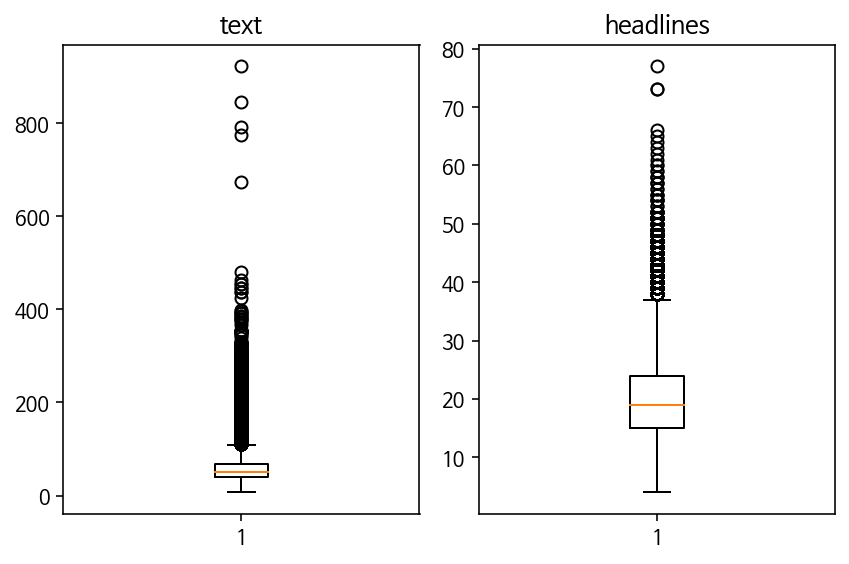

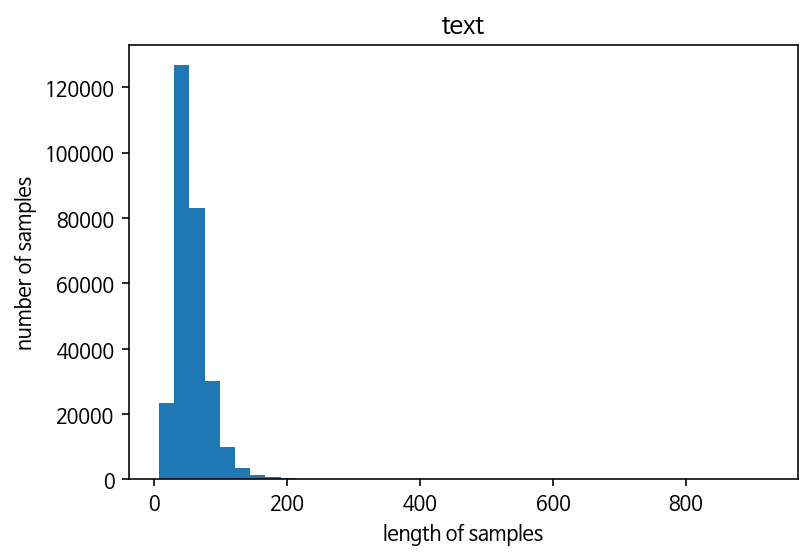

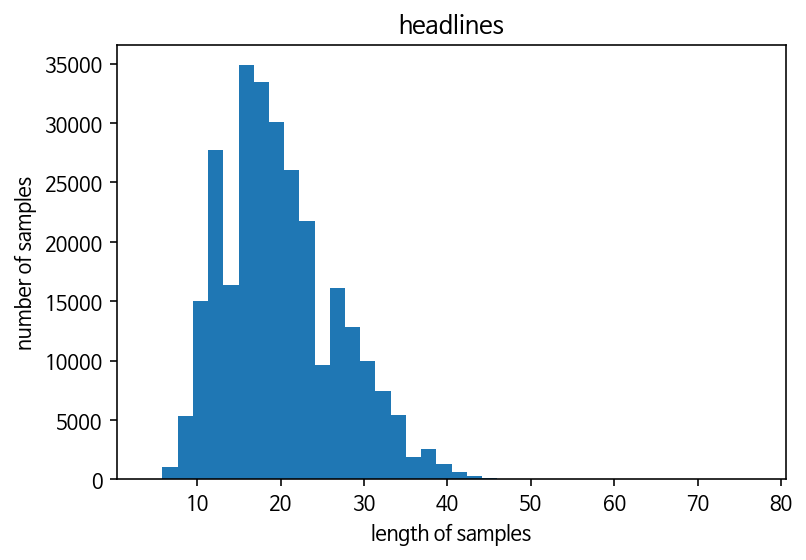

,Text,Summary
0,"[그럼, 날짜, 는, 가격, 큰, 변동, 없, 으면, 6, 28, 7, 13, 로,...","[비행기, 표, 가격, 에, 대해, 이야기, 하, 며, 특가, 이벤트, 를, 기다리..."
1,"[kf, 마스크, 만, 5, 부제, 하, 는, 거, 지, 응, 면, 마스크, 는, ...","[비염, 이, 있, 어서, 싸, 게, 나온, 일회용, 부직포, 마스크, 를, 사, ..."
2,"[아, 근데, 케이크, 업체, 들, 봤, 는데, 중앙, 동쪽, 거기, 는, 맛, 만...","[케이크, 업체, 중, 중앙동, 쪽, 은, 맛, 만, 있, 고, 디자인, 은, 별로..."
3,"[칫솔, 사야, 하, 는데, 쓱, 으로, 살까, 뭘, 칫솔, 사, 는, 것, 까지,...","[칫솔, 을, 3, 개월, 에, 하나, 씩, 바꿔서, 왕, 칫솔, 사, 러, 신세계..."
4,"[잠, 도, 안, 오, 네, 얼릉, 고구마, 츄, 먹, 고, 싶, 단, 그게, 그렇...","[잠, 도, 안, 와서, 고구마, 말랭이, 를, 양, 심상, 하나, 만, 먹, 으려..."
...,...,...
279987,"[도착, 하, 샸나염, 자리, 잡, 고, 알려, 주, 이소, 아아, 나, 다이소, ...","[역, 근처, 에, 있, 는, 곳, 이, 리모, 델, 링, 을, 하, 여, 더, 좋..."
279988,"[시간, 잘, 봐라, 겁나, 여러, 가지, 다, 예약, 내역, 올려, 바바, 그러,...","[교통편, 및, 호텔, 예약, 과, 관련, 한, 사항, 을, 확인, 한다]"
279989,"[언제, 도착, 요정, 이, 십니까, 15, 분, 뒤, 도착, 이, 룝, 옥희, 여...","[가, 고, 있, 는, 길, 을, 설명, 해, 주, 고, 15, 분, 뒤, 도착, ..."
279990,"[근데, 현인, 가요제, 가, 면, 최소, 20, 시간, 은, 줄서, 서, 기다려야...","[저녁, 에, 하, 는, 현인, 가요제, 는, 아침, 부터, 12, 시간, 은, 줄..."


In [87]:
# 전체 데이터 len 출력

sentence_len_total(train)

In [14]:
mecab = Mecab()

def df_ex(data):
    df_ext = data
    #df_ext.drop(columns= ['Id', 'Category'], inplace = True, axis = 1)
    #df_ext.reset_index(inplace=True, drop=True)
    
    # 빈 리스트 적용
    text_split_text = []
    text_split_summary = []
    
    # 반복문으로 Mecab 적용
    for text_sen in df_ext['Text'].iloc[range(0, len(df_ext))]:
        text_split_text.append(mecab.morphs(text_sen))

    for summary_sen in df_ext['Summary'].iloc[range(0, len(df_ext))]:
        text_split_summary.append(mecab.morphs(summary_sen))
        
    df_ext['Text'] = text_split_text
    df_ext['Summary'] = text_split_summary
    
    return df_ext

    # Mecab 적용 후 길이 출력
    #text_len = df_ext.Text.map(len)
    #headlines_len = df_ext.Summary.map(len)

df_1 = df_ex(train)

In [15]:
df_1

,Text,Summary
0,"[그럼, 날짜, 는, 가격, 큰, 변동, 없, 으면, 6, 28, 7, 13, 로,...","[비행기, 표, 가격, 에, 대해, 이야기, 하, 며, 특가, 이벤트, 를, 기다리..."
1,"[kf, 마스크, 만, 5, 부제, 하, 는, 거, 지, 응, 면, 마스크, 는, ...","[비염, 이, 있, 어서, 싸, 게, 나온, 일회용, 부직포, 마스크, 를, 사, ..."
2,"[아, 근데, 케이크, 업체, 들, 봤, 는데, 중앙, 동쪽, 거기, 는, 맛, 만...","[케이크, 업체, 중, 중앙동, 쪽, 은, 맛, 만, 있, 고, 디자인, 은, 별로..."
3,"[칫솔, 사야, 하, 는데, 쓱, 으로, 살까, 뭘, 칫솔, 사, 는, 것, 까지,...","[칫솔, 을, 3, 개월, 에, 하나, 씩, 바꿔서, 왕, 칫솔, 사, 러, 신세계..."
4,"[잠, 도, 안, 오, 네, 얼릉, 고구마, 츄, 먹, 고, 싶, 단, 그게, 그렇...","[잠, 도, 안, 와서, 고구마, 말랭이, 를, 양, 심상, 하나, 만, 먹, 으려..."
...,...,...
279987,"[도착, 하, 샸나염, 자리, 잡, 고, 알려, 주, 이소, 아아, 나, 다이소, ...","[역, 근처, 에, 있, 는, 곳, 이, 리모, 델, 링, 을, 하, 여, 더, 좋..."
279988,"[시간, 잘, 봐라, 겁나, 여러, 가지, 다, 예약, 내역, 올려, 바바, 그러,...","[교통편, 및, 호텔, 예약, 과, 관련, 한, 사항, 을, 확인, 한다]"
279989,"[언제, 도착, 요정, 이, 십니까, 15, 분, 뒤, 도착, 이, 룝, 옥희, 여...","[가, 고, 있, 는, 길, 을, 설명, 해, 주, 고, 15, 분, 뒤, 도착, ..."
279990,"[근데, 현인, 가요제, 가, 면, 최소, 20, 시간, 은, 줄서, 서, 기다려야...","[저녁, 에, 하, 는, 현인, 가요제, 는, 아침, 부터, 12, 시간, 은, 줄..."


In [16]:
# Mecab 적용 후 길이 출력

def below_threshold_len(data, text_max_len, headlines_max_len):
    text_len = data.Text.map(len)
    headlines_len = data.Summary.map(len)
    
    cnt_t = 0
    for s in text_len:
        if(s <= text_max_len):
            cnt_t = cnt_t + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(text_max_len, (cnt_t / len(text_len))))
    
    cnt_s = 0
    for s in headlines_len:
        if(s <= headlines_max_len):
            cnt_s = cnt_s + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(headlines_max_len, (cnt_s / len(headlines_len))))
    
    #data = data[data['Text'].apply(lambda x: len([s for s in text_len]) <= text_max_len)]
    #data = data[data['Summary'].apply(lambda x: len([s for s in headlines_len]) <= headlines_max_len)]
    #print('전체 샘플수 :', (len(data)))
    #return data

In [17]:
text_max_len = 110.0
headlines_max_len = 38.0
below_threshold_len(df_1, text_max_len, headlines_max_len)

전체 샘플 중 길이가 110.0 이하인 샘플의 비율: 0.9635453870110574
전체 샘플 중 길이가 38.0 이하인 샘플의 비율: 0.9913497528500814


In [160]:
text_len = df_1.Text.map(len)
headlines_len = df_1.Summary.map(len)
text_max_len = 110.0
headlines_max_len = 38.0

df_1 = df_1[df_1['Text'].apply(lambda x: [x for x in text_len] <= text_max_len)]

print(len(df_1))

TypeError: '<=' not supported between instances of 'list' and 'float'

In [156]:
type([s for s in text_len][0])

int

In [20]:
text_len = df_1.Text.map(len)
headlines_len = df_1.Summary.map(len)
[s for s in text_len][0]

96

In [25]:
[x for x in text_len]

['그럼',
 '날짜',
 '는',
 '가격',
 '큰',
 '변동',
 '없',
 '으면',
 '6',
 '28',
 '7',
 '13',
 '로',
 '확정',
 '할까',
 '우리',
 '비행',
 '포함',
 '15',
 '일',
 '이',
 '야',
 '16',
 '일',
 '아',
 '너',
 '나',
 '한테',
 '돈',
 '보내',
 '주',
 '면',
 '지금',
 '할',
 '수',
 '잇',
 '옹',
 '얼마',
 '야',
 '최종',
 '결제',
 '액',
 '이',
 '잠시',
 '만',
 '인',
 '당',
 '952',
 '900',
 '합쳐서',
 '1',
 '905',
 '800',
 '근데',
 '나중',
 '에',
 '특가',
 '뜰',
 '수',
 '도',
 '있',
 '으려나',
 '좀',
 '더',
 '두',
 '고',
 '볼까',
 '뜨',
 '기',
 '야',
 '뜨',
 '겠',
 '지',
 '웅웅',
 '보',
 '니까',
 '아시아',
 '나',
 '는',
 '특가',
 '이벤트',
 '꽤',
 '하',
 '는',
 '것',
 '같',
 '아서',
 '일단',
 '두',
 '고',
 '보장',
 '그래',
 '구',
 '럼',
 '일단',
 '자자']

In [30]:
df_1[df_1['Text']].iloc[0]

TypeError: unhashable type: 'list'

In [37]:
df_1['Text'].iloc[0]

['그럼',
 '날짜',
 '는',
 '가격',
 '큰',
 '변동',
 '없',
 '으면',
 '6',
 '28',
 '7',
 '13',
 '로',
 '확정',
 '할까',
 '우리',
 '비행',
 '포함',
 '15',
 '일',
 '이',
 '야',
 '16',
 '일',
 '아',
 '너',
 '나',
 '한테',
 '돈',
 '보내',
 '주',
 '면',
 '지금',
 '할',
 '수',
 '잇',
 '옹',
 '얼마',
 '야',
 '최종',
 '결제',
 '액',
 '이',
 '잠시',
 '만',
 '인',
 '당',
 '952',
 '900',
 '합쳐서',
 '1',
 '905',
 '800',
 '근데',
 '나중',
 '에',
 '특가',
 '뜰',
 '수',
 '도',
 '있',
 '으려나',
 '좀',
 '더',
 '두',
 '고',
 '볼까',
 '뜨',
 '기',
 '야',
 '뜨',
 '겠',
 '지',
 '웅웅',
 '보',
 '니까',
 '아시아',
 '나',
 '는',
 '특가',
 '이벤트',
 '꽤',
 '하',
 '는',
 '것',
 '같',
 '아서',
 '일단',
 '두',
 '고',
 '보장',
 '그래',
 '구',
 '럼',
 '일단',
 '자자']

In [41]:
from tqdm import tqdm
import time
for num in tqdm(range(0, len(df_1))):
    df_2 = pd.DataFrame()
    if [x for x in text_len][num] <= text_max_len:
        # df_2에 row를 추가한다.
        df_2.append(df_1['Text'].iloc[num])

  4%|▎         | 9864/279992 [03:22<1:32:20, 48.76it/s]


KeyboardInterrupt: 

In [137]:
# max_len 길이를 초과하는 데이터 제외시키기
df_1 = df_1[df_1['Text'].apply(lambda x: len(s for s in text_len) <= text_max_len)]
df_1 = df_1[df_1['Summary'].apply(lambda x: len(s for s in headlines_len) <= headlines_max_len)]
print('전체 샘플수 :', (len(df_1)))

NameError: name 'text_len' is not defined

In [108]:
# max_len을 설정하여 포함되는 문장만 출력

def below_threshold_len(data, text_max_len, headlines_max_len):
    df_ext = data
    #df_ext.drop(columns= ['Id', 'Category'], inplace = True, axis = 1)
    #df_ext.reset_index(inplace=True, drop=True)
    
    # 빈 리스트 적용
    text_split_text = []
    text_split_summary = []
    
    # 반복문으로 Mecab 적용
    for text_sen in df_ext['Text'].iloc[range(0, len(df_ext))]:
        text_split_text.append(mecab.morphs(text_sen))

    for summary_sen in df_ext['Summary'].iloc[range(0, len(df_ext))]:
        text_split_summary.append(mecab.morphs(summary_sen))
        
    df_ext['Text'] = text_split_text
    df_ext['Summary'] = text_split_summary
    
    # Mecab 적용 후 길이 출력
    text_len = df_ext.Text.map(len)
    headlines_len = df_ext.Summary.map(len)
    
    cnt_t = 0
    for s in text_len:
        if(text_len <= text_max_len):
            cnt_t = cnt_t + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(text_max_len, (cnt_t / len(text_len))))
    
    cnt_s = 0
    for s in headlines_len:
        if(headlines_len <= headlines_max_len):
            cnt_s = cnt_s + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(headlines_max_len, (cnt_s / len(headlines_len))))

In [33]:
# Mecab 적용 후 문장 len 출력하는 함수 구현

# 한글 데이터 Mecab 적용하기
mecab = Mecab()

Categori = ['개인 및 관계', '주거와 생활', '여가 생활', '식음료', '상거래(쇼핑)', '행사', 
            '일과 직업', '미용과 건강', '시사/교육']

def sentence_len(data, categori):
    df_ext = data[data['Category'] == categori]
    df_ext.drop(columns= ['Id', 'Category'], inplace = True, axis = 1)
    df_ext.reset_index(inplace=True, drop=True)
    
    # 빈 리스트 적용
    text_split_text = []
    text_split_summary = []
    
    # 반복문으로 Mecab 적용
    for text_sen in df_ext['Text'].iloc[range(0, len(df_ext))]:
        text_split_text.append(mecab.morphs(text_sen))

    for summary_sen in df_ext['Summary'].iloc[range(0, len(df_ext))]:
        text_split_summary.append(mecab.morphs(summary_sen))
        
    df_ext['Text'] = text_split_text
    df_ext['Summary'] = text_split_summary

    text_len = df_ext.Text.map(len)
    headlines_len = df_ext.Summary.map(len)
    
    print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
    print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
    print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
    print('헤드라인의 최소 길이 : {}'.format(np.min(headlines_len)))
    print('헤드라인의 최대 길이 : {}'.format(np.max(headlines_len)))
    print('헤드라인의 평균 길이 : {}'.format(np.mean(headlines_len)))

    plt.subplot(1,2,1)
    plt.boxplot(text_len)
    plt.title('text')
    plt.subplot(1,2,2)
    plt.boxplot(headlines_len)
    plt.title('headlines')
    plt.tight_layout()
    plt.show()

    plt.title('text')
    plt.hist(text_len, bins = 40)
    plt.xlabel('length of samples')
    plt.ylabel('number of samples')
    plt.show()

    plt.title('headlines')
    plt.hist(headlines_len, bins = 40)
    plt.xlabel('length of samples')
    plt.ylabel('number of samples')
    plt.show()
    
    #return df_ext

카테고리 :  개인 및 관계
텍스트의 최소 길이 : 7
텍스트의 최대 길이 : 923
텍스트의 평균 길이 : 53.601687051876844
헤드라인의 최소 길이 : 4
헤드라인의 최대 길이 : 63
헤드라인의 평균 길이 : 19.7104456628708


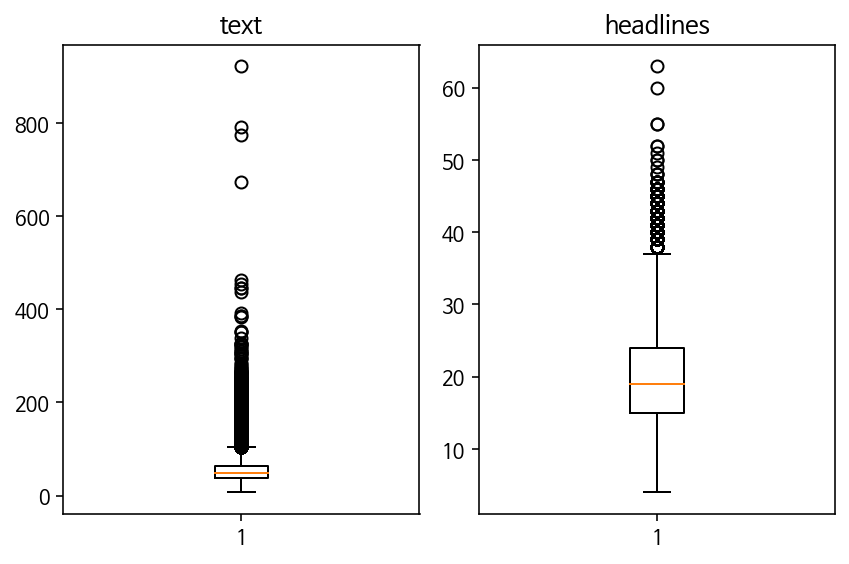

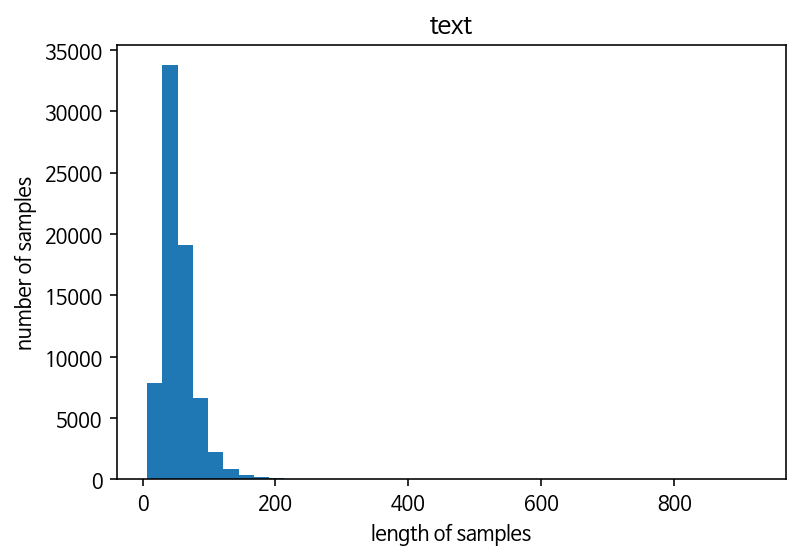

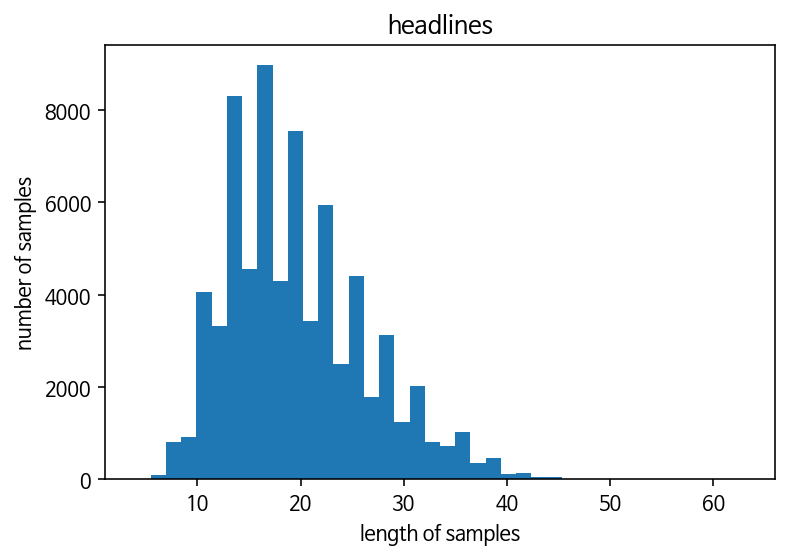

카테고리 :  주거와 생활
텍스트의 최소 길이 : 8
텍스트의 최대 길이 : 424
텍스트의 평균 길이 : 56.28305186037761
헤드라인의 최소 길이 : 5
헤드라인의 최대 길이 : 73
헤드라인의 평균 길이 : 20.09181256778592


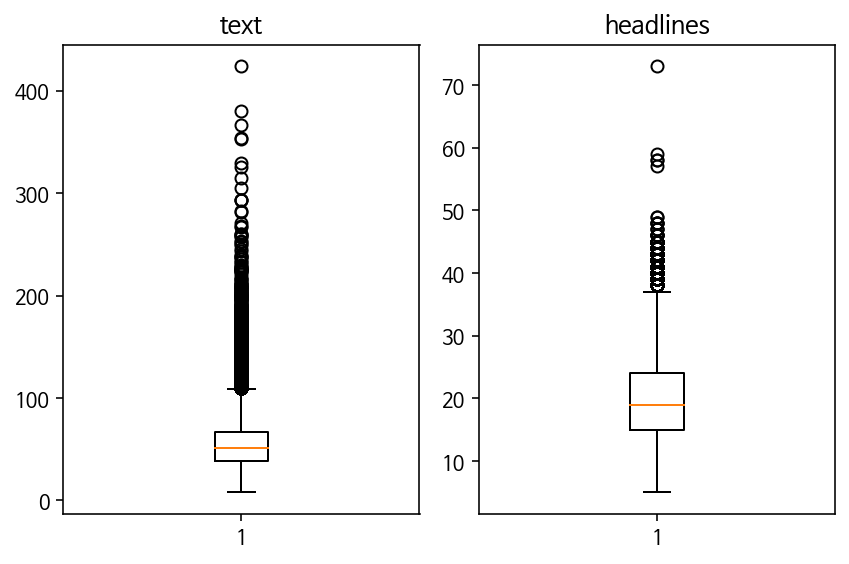

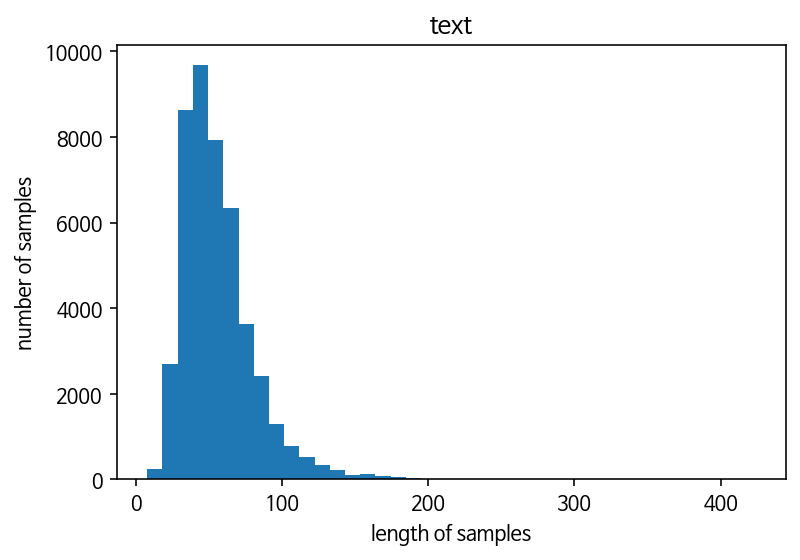

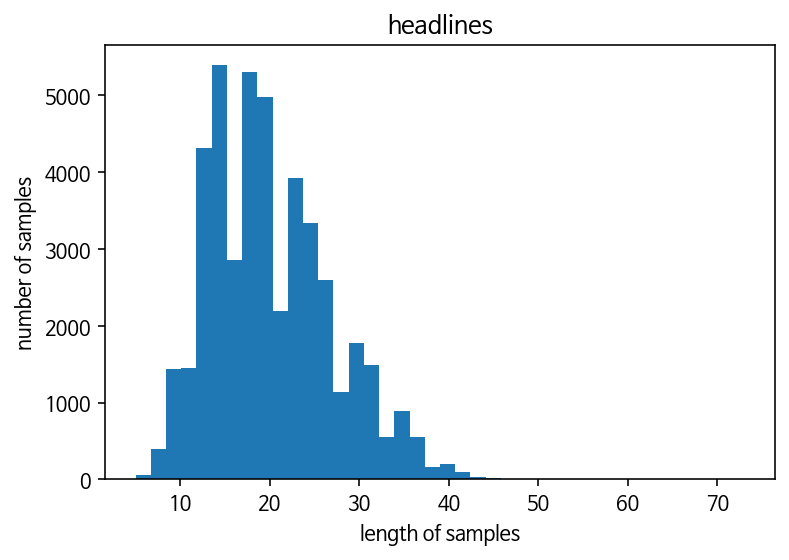

카테고리 :  여가 생활
텍스트의 최소 길이 : 11
텍스트의 최대 길이 : 393
텍스트의 평균 길이 : 55.3388089766505
헤드라인의 최소 길이 : 5
헤드라인의 최대 길이 : 60
헤드라인의 평균 길이 : 19.68879620960649


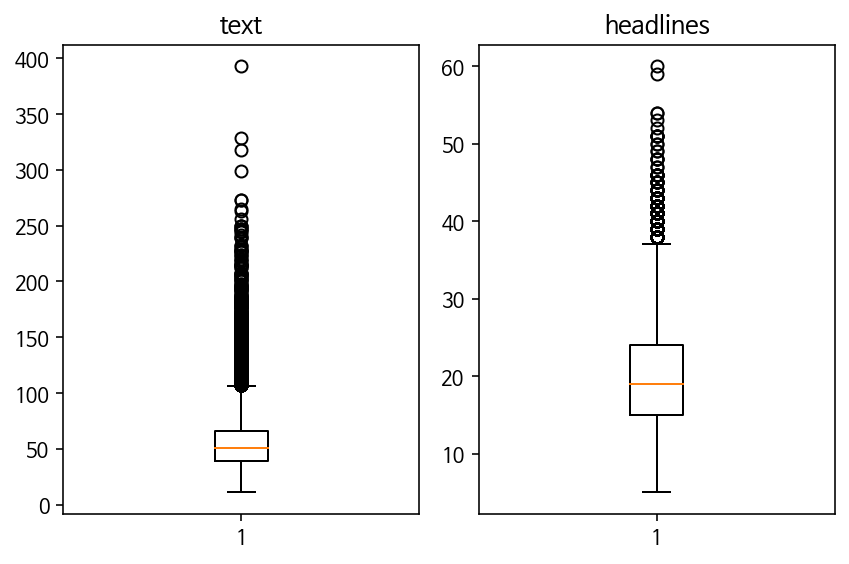

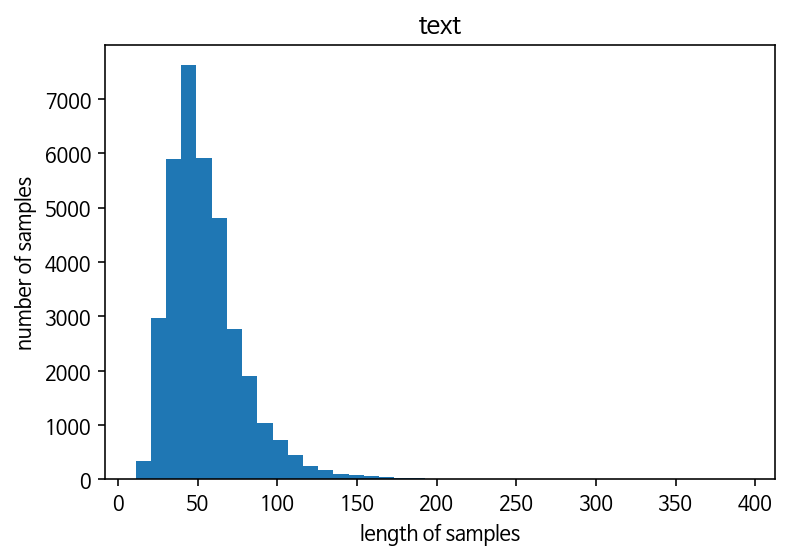

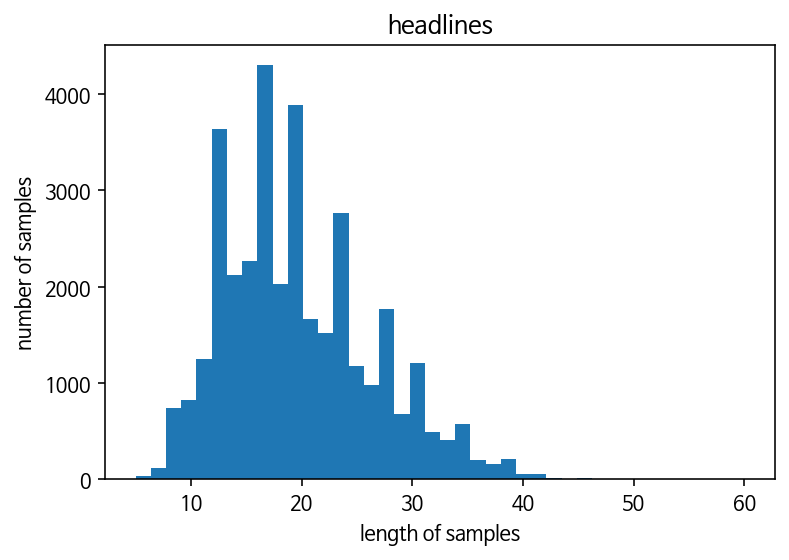

카테고리 :  식음료
텍스트의 최소 길이 : 11
텍스트의 최대 길이 : 344
텍스트의 평균 길이 : 52.6497482109727
헤드라인의 최소 길이 : 4
헤드라인의 최대 길이 : 61
헤드라인의 평균 길이 : 19.467863768884175


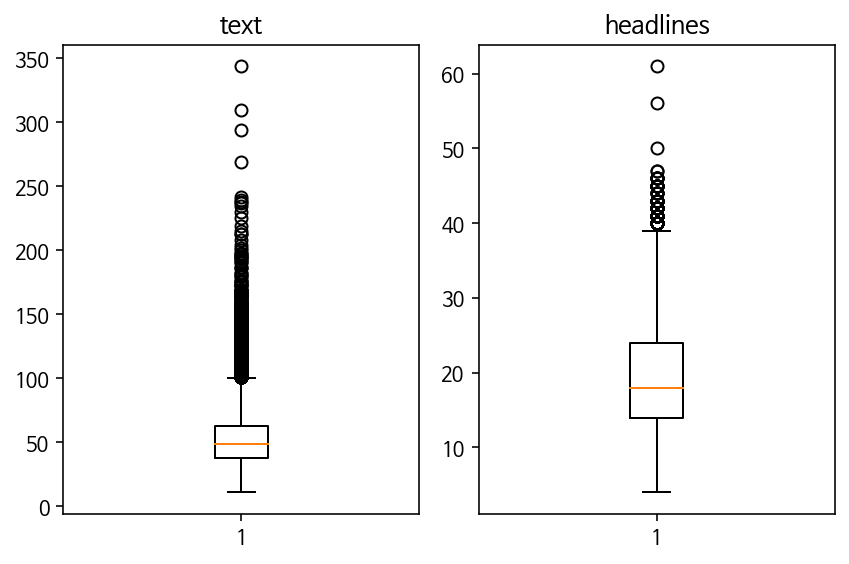

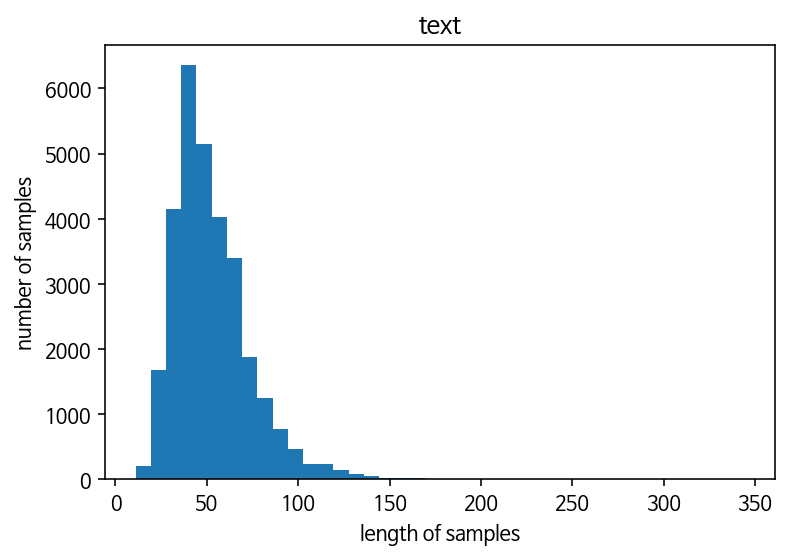

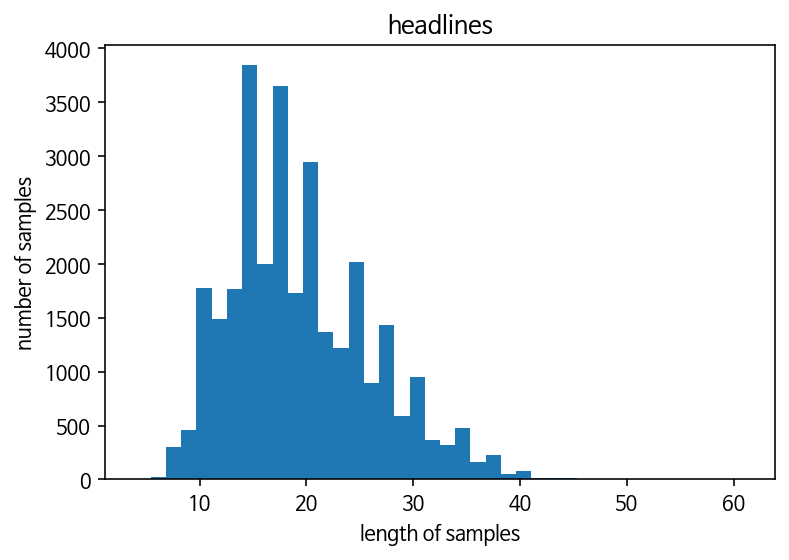

카테고리 :  상거래(쇼핑)
텍스트의 최소 길이 : 8
텍스트의 최대 길이 : 262
텍스트의 평균 길이 : 56.530952924176745
헤드라인의 최소 길이 : 6
헤드라인의 최대 길이 : 73
헤드라인의 평균 길이 : 20.197467488021903


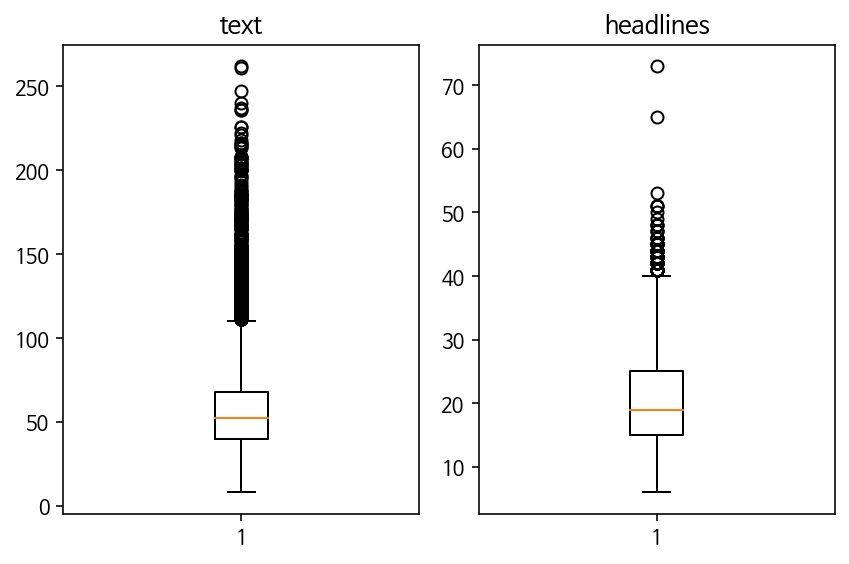

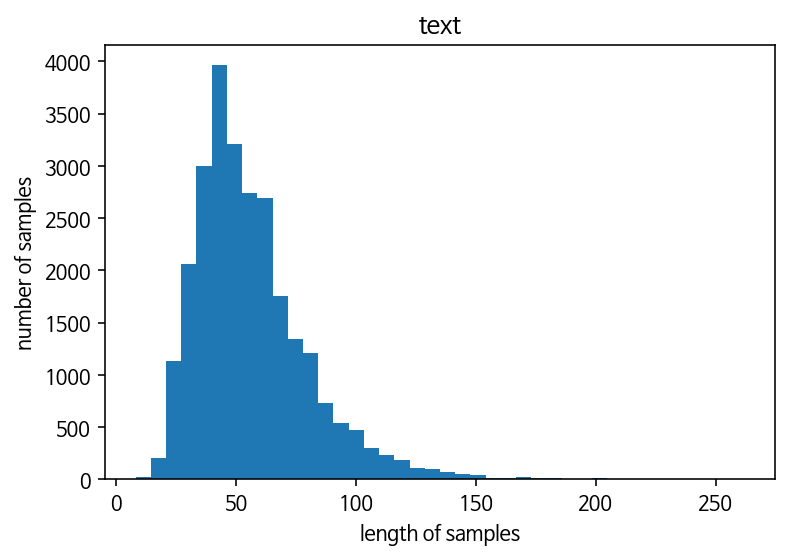

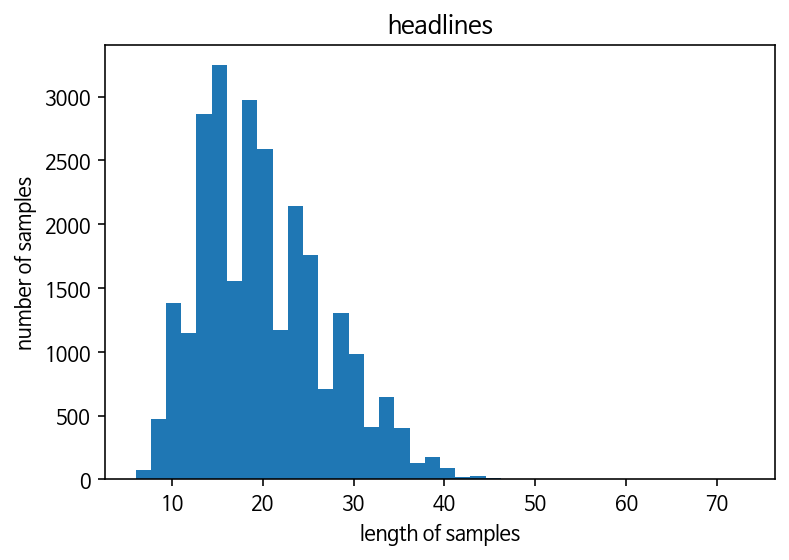

카테고리 :  행사
텍스트의 최소 길이 : 9
텍스트의 최대 길이 : 437
텍스트의 평균 길이 : 55.509466679163936
헤드라인의 최소 길이 : 5
헤드라인의 최대 길이 : 55
헤드라인의 평균 길이 : 19.759302652544754


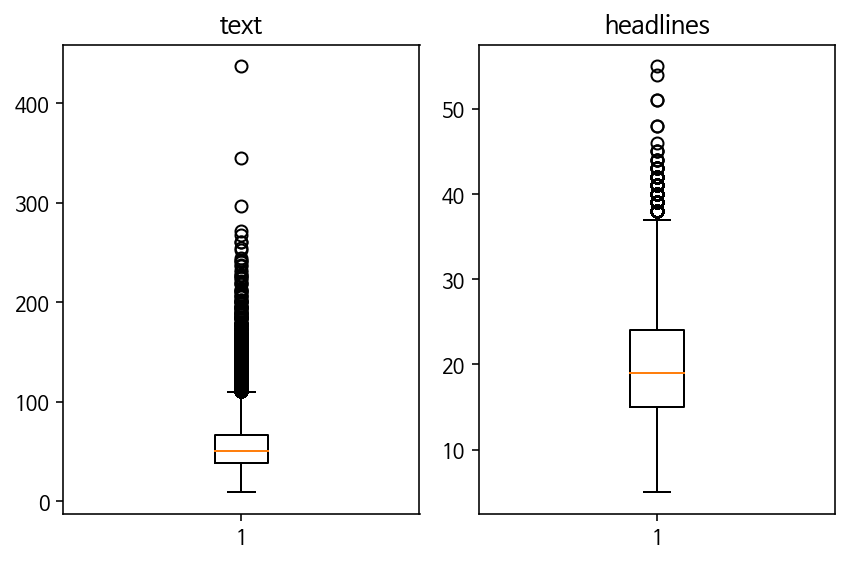

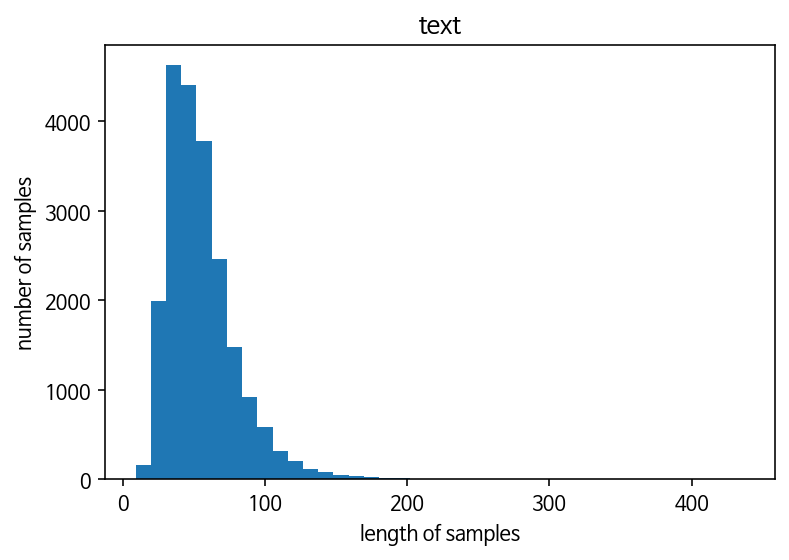

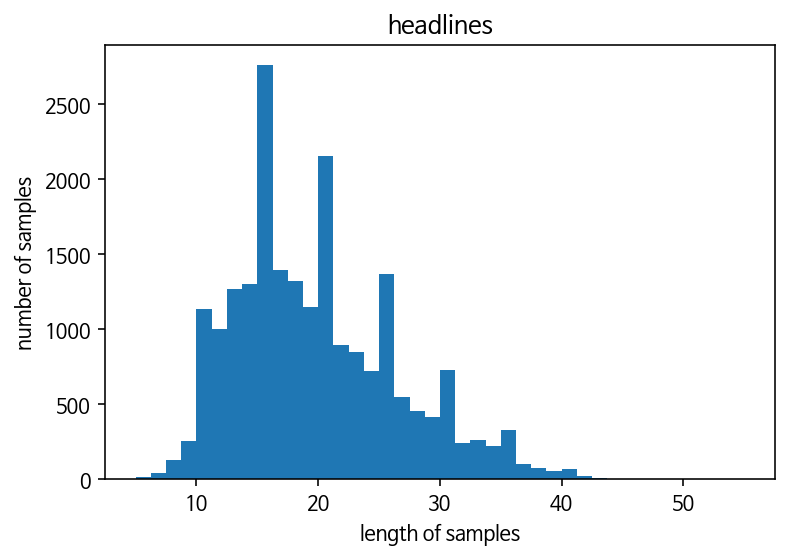

카테고리 :  일과 직업
텍스트의 최소 길이 : 9
텍스트의 최대 길이 : 845
텍스트의 평균 길이 : 63.94262776581163
헤드라인의 최소 길이 : 5
헤드라인의 최대 길이 : 66
헤드라인의 평균 길이 : 21.190082240062658


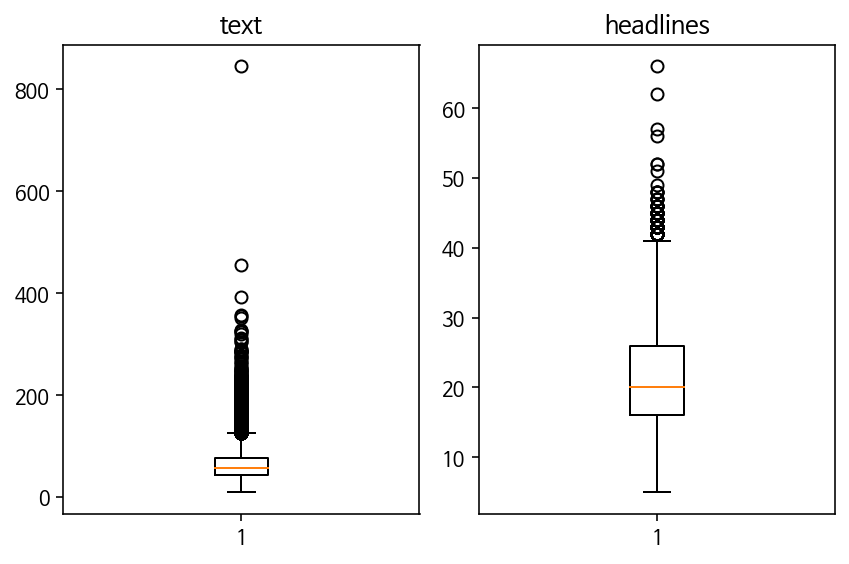

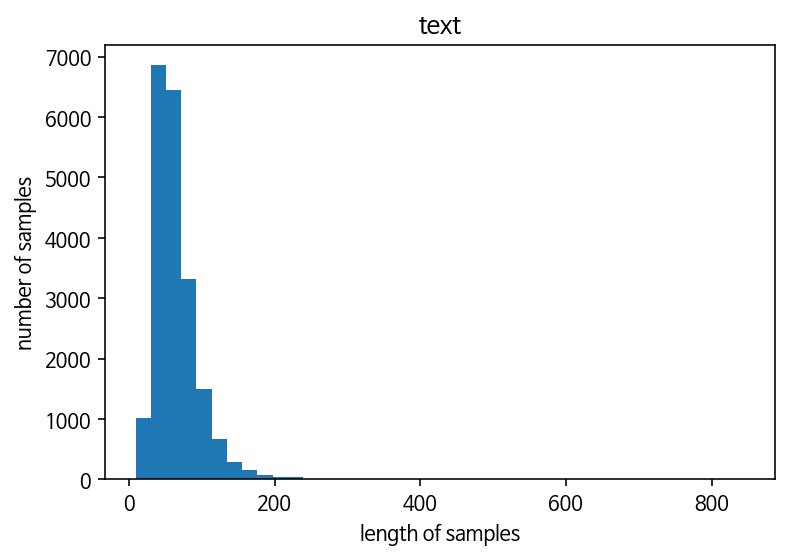

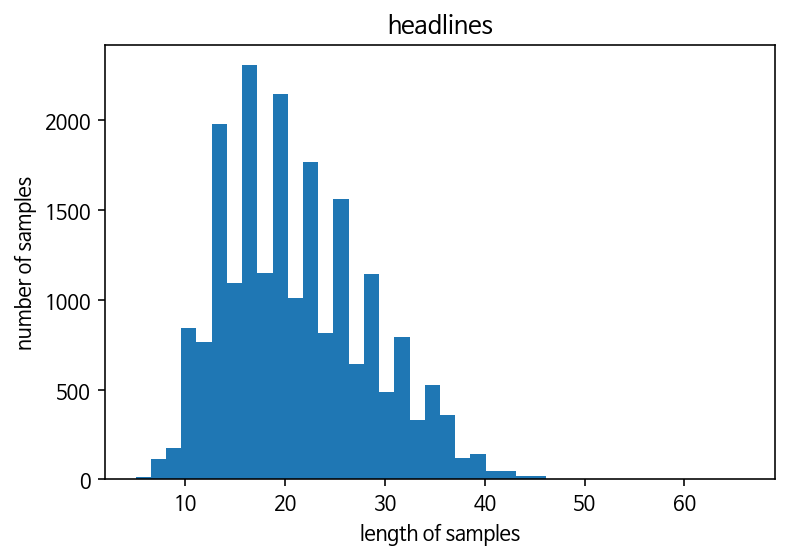

카테고리 :  미용과 건강
텍스트의 최소 길이 : 13
텍스트의 최대 길이 : 399
텍스트의 평균 길이 : 59.360770988341436
헤드라인의 최소 길이 : 5
헤드라인의 최대 길이 : 77
헤드라인의 평균 길이 : 20.587790731735897


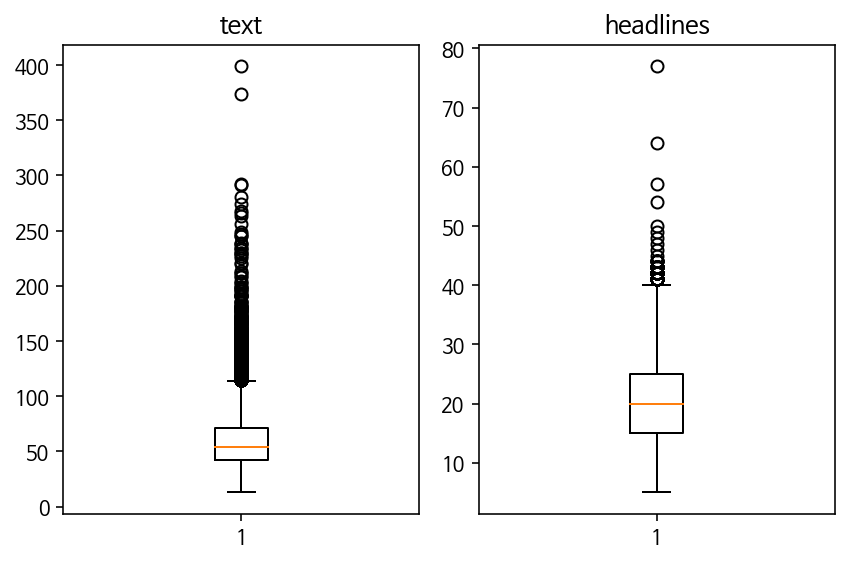

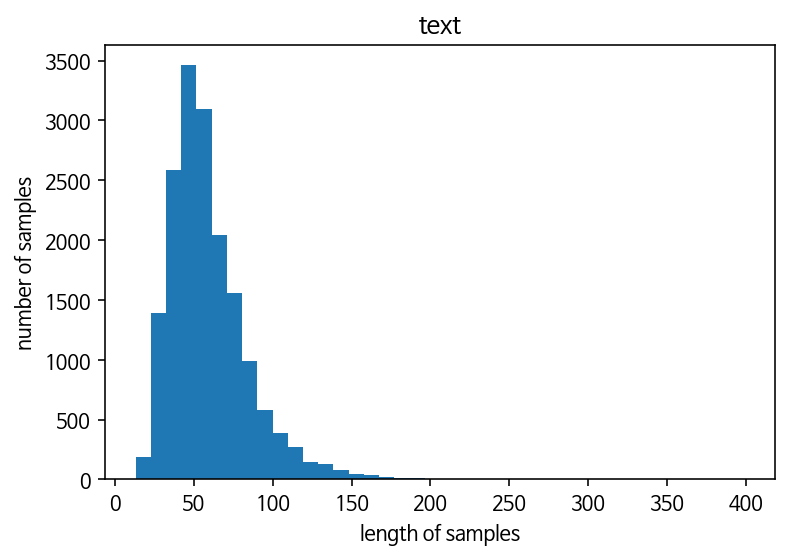

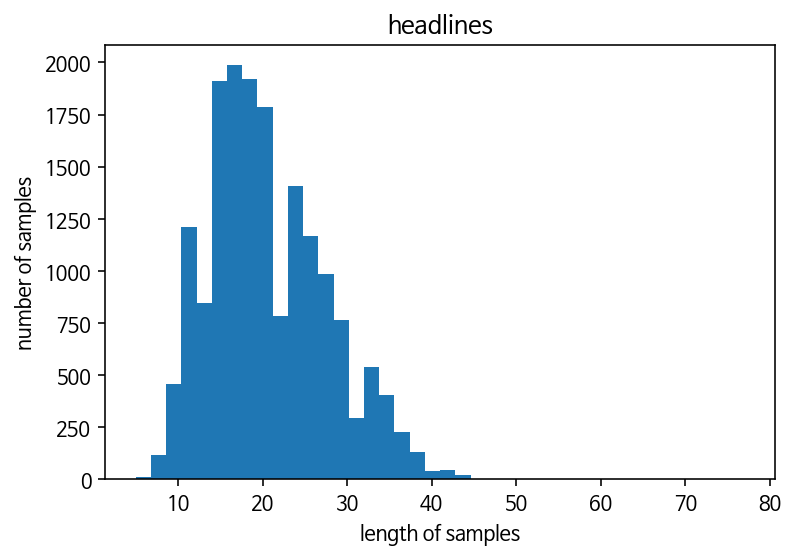

카테고리 :  시사/교육
텍스트의 최소 길이 : 12
텍스트의 최대 길이 : 481
텍스트의 평균 길이 : 60.16426556902203
헤드라인의 최소 길이 : 6
헤드라인의 최대 길이 : 58
헤드라인의 평균 길이 : 20.789923012424726


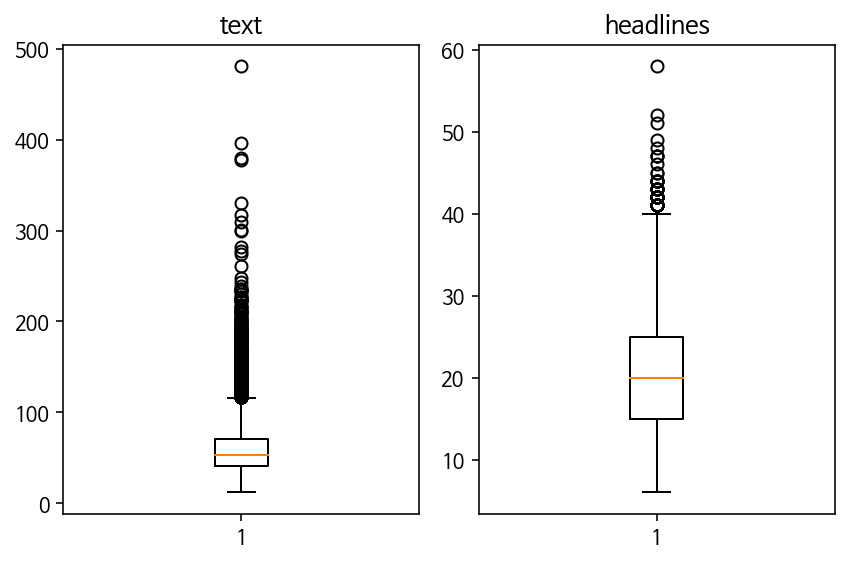

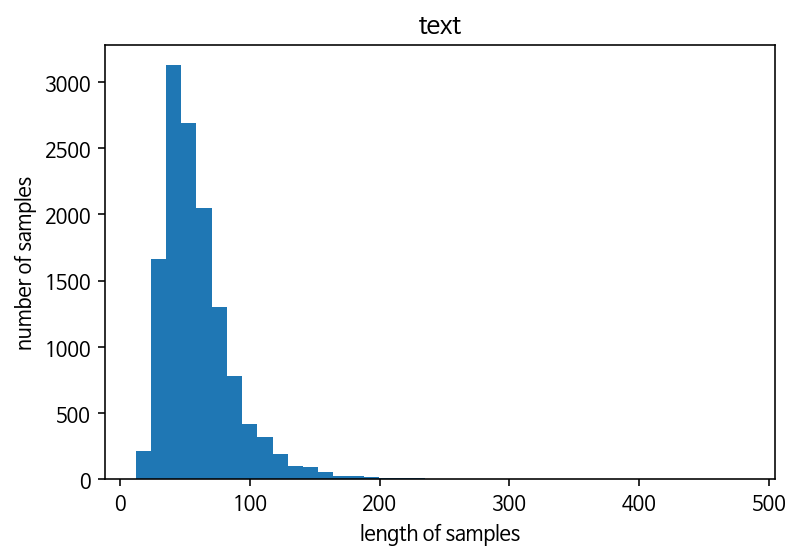

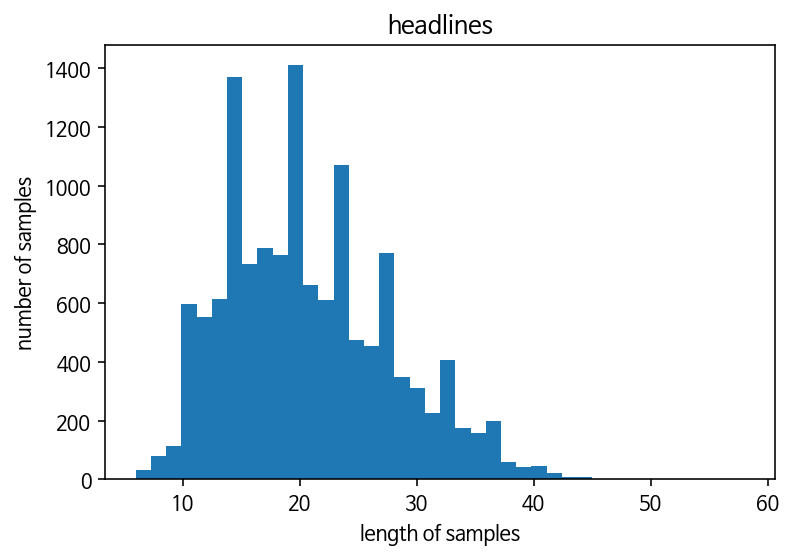

In [34]:
# 카테고리별 문장 길이 출력 (전처리 후)
for cate in Categori:
    print('카테고리 : ',cate)
    sentence_len(train, cate)

카테고리 :  개인 및 관계
텍스트의 최소 길이 : 9
텍스트의 최대 길이 : 937
텍스트의 평균 길이 : 59.258006467032196
헤드라인의 최소 길이 : 4
헤드라인의 최대 길이 : 63
헤드라인의 평균 길이 : 19.709798959651344


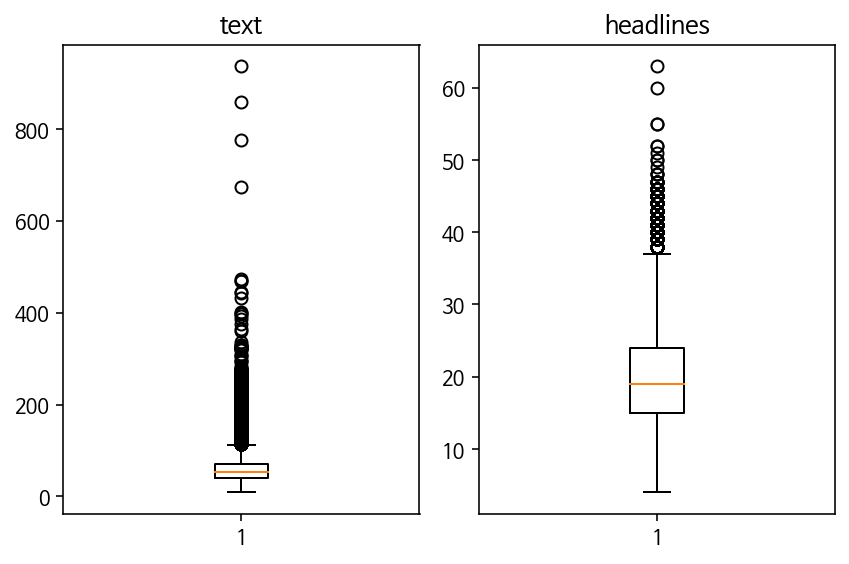

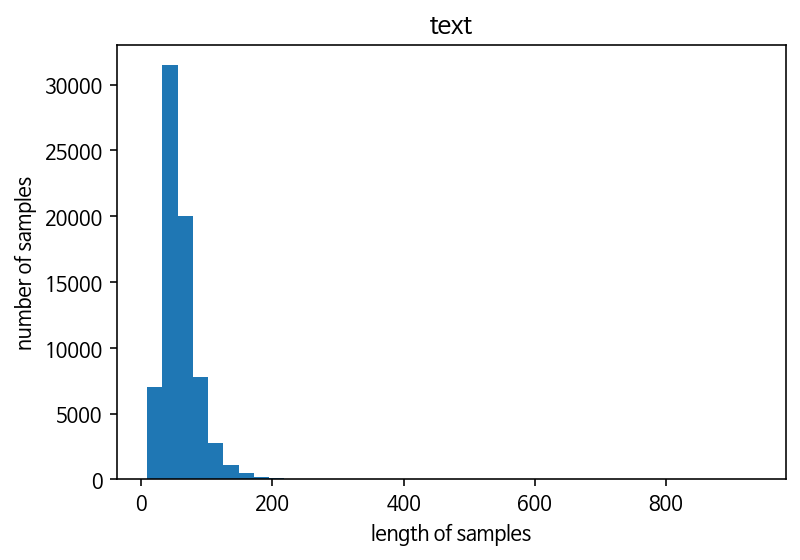

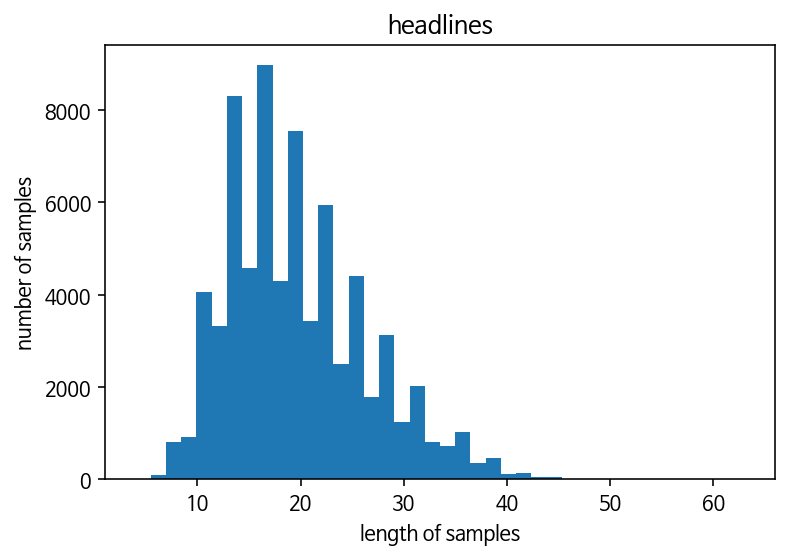

카테고리 :  주거와 생활
텍스트의 최소 길이 : 10
텍스트의 최대 길이 : 432
텍스트의 평균 길이 : 60.48104207707121
헤드라인의 최소 길이 : 5
헤드라인의 최대 길이 : 73
헤드라인의 평균 길이 : 20.090661590561986


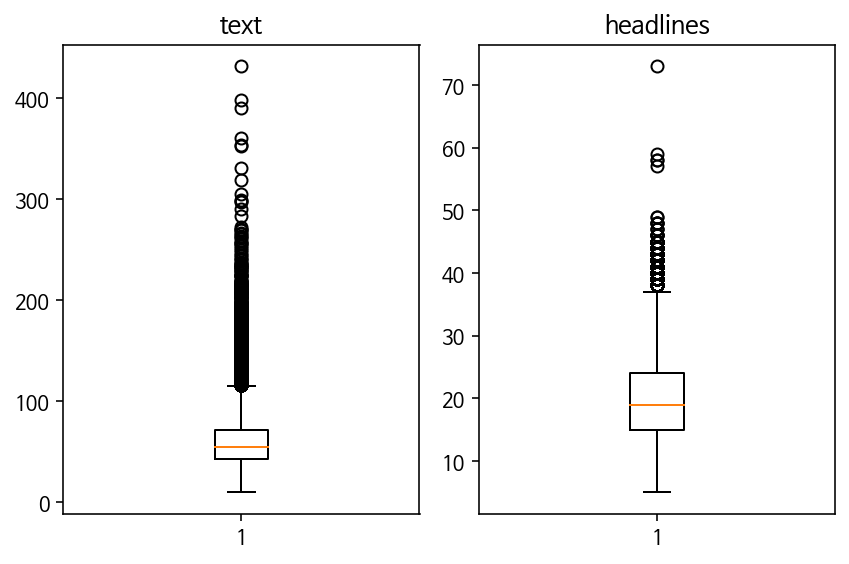

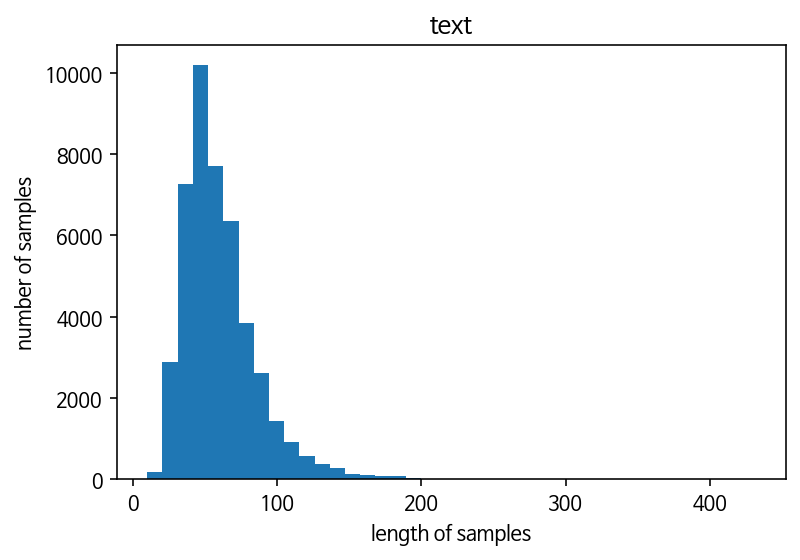

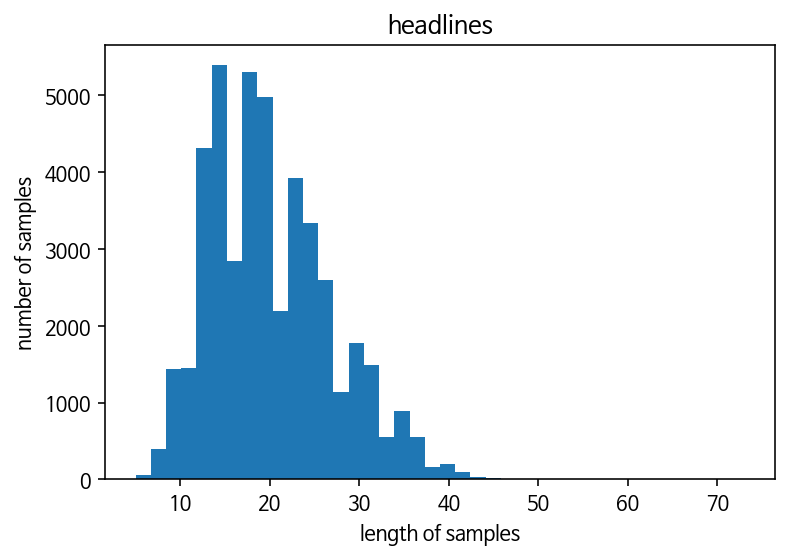

카테고리 :  여가 생활
텍스트의 최소 길이 : 12
텍스트의 최대 길이 : 422
텍스트의 평균 길이 : 60.55096887678384
헤드라인의 최소 길이 : 5
헤드라인의 최대 길이 : 60
헤드라인의 평균 길이 : 19.686100944761257


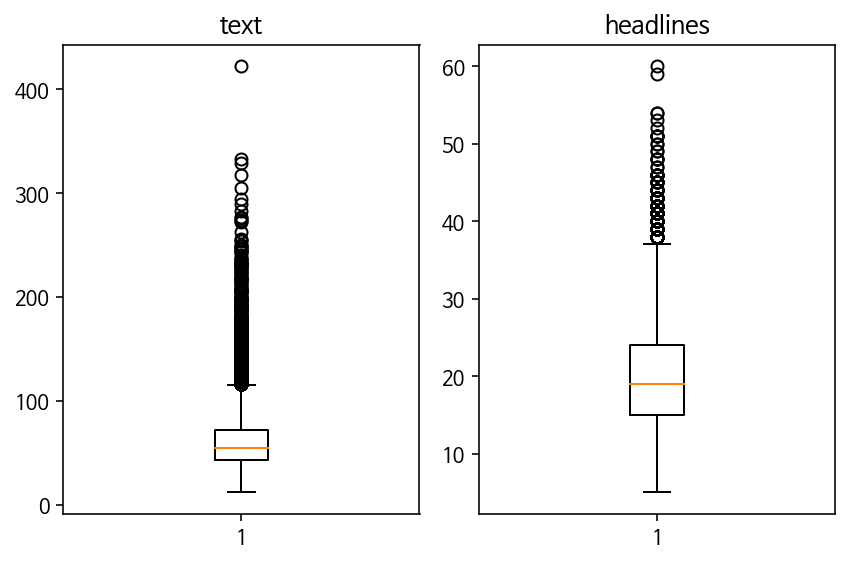

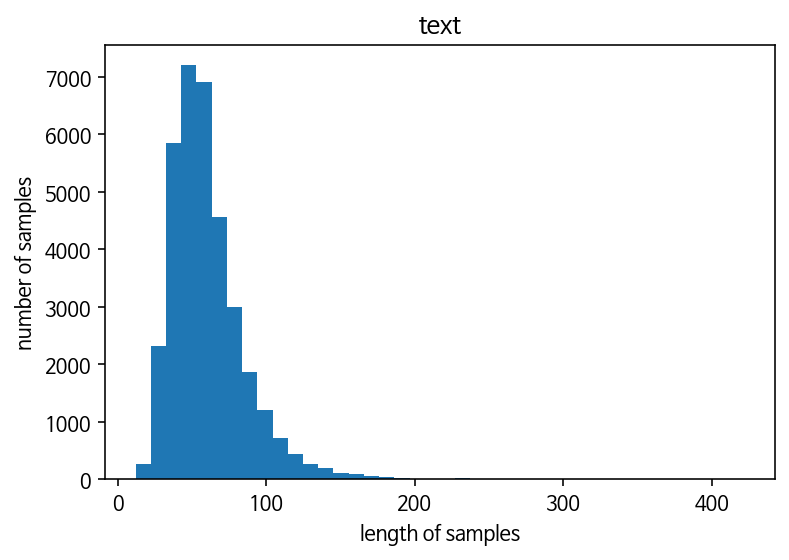

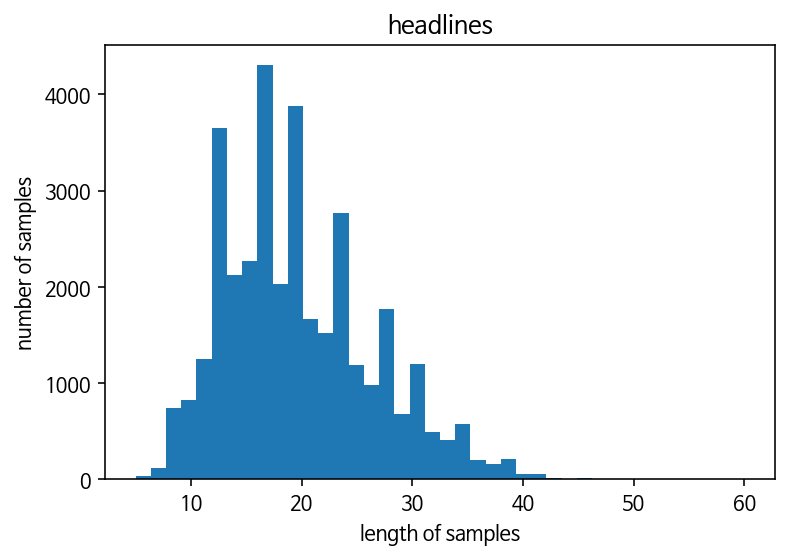

카테고리 :  식음료
텍스트의 최소 길이 : 13
텍스트의 최대 길이 : 352
텍스트의 평균 길이 : 56.99178372647761
헤드라인의 최소 길이 : 4
헤드라인의 최대 길이 : 61
헤드라인의 평균 길이 : 19.467399946991783


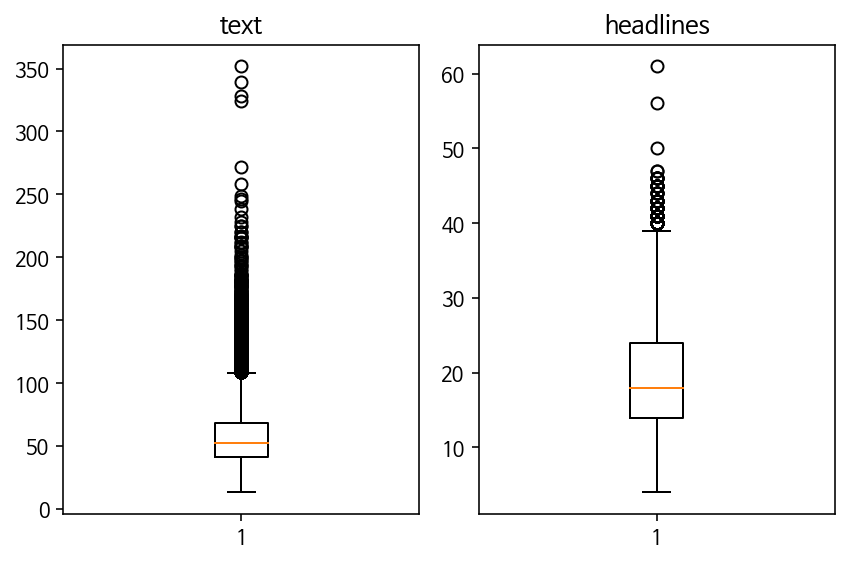

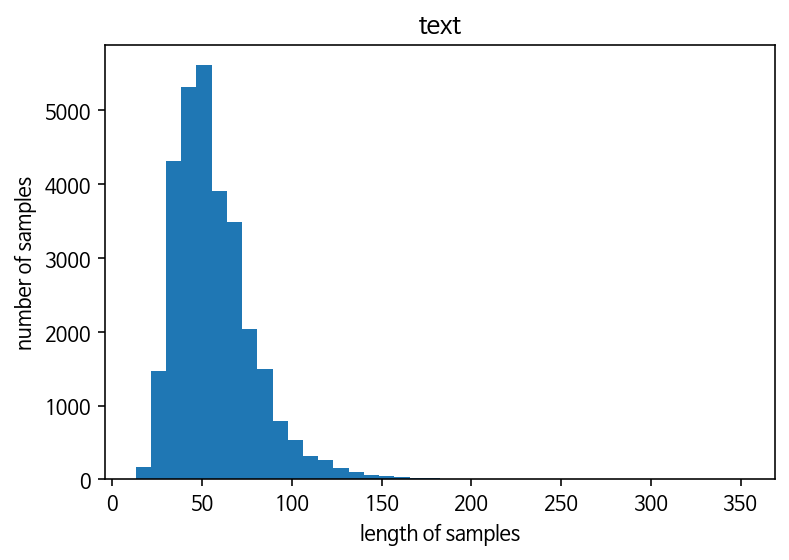

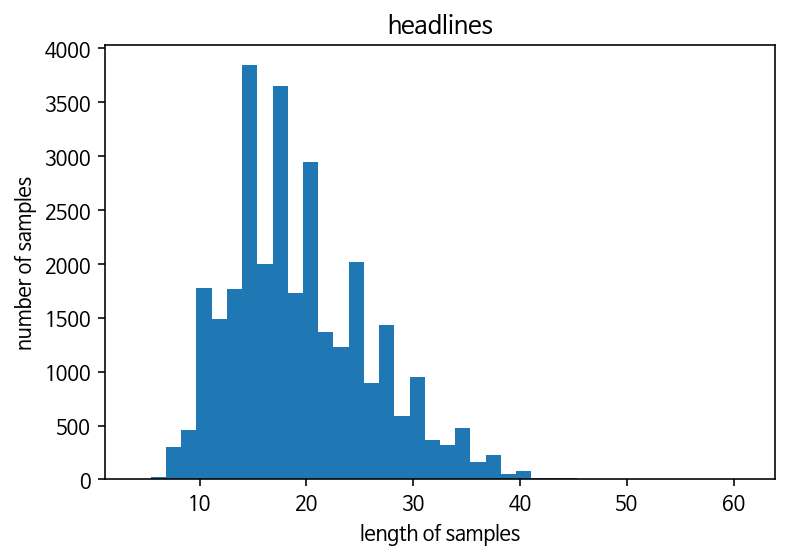

카테고리 :  상거래(쇼핑)
텍스트의 최소 길이 : 12
텍스트의 최대 길이 : 269
텍스트의 평균 길이 : 60.83051943113545
헤드라인의 최소 길이 : 6
헤드라인의 최대 길이 : 73
헤드라인의 평균 길이 : 20.197201308084264


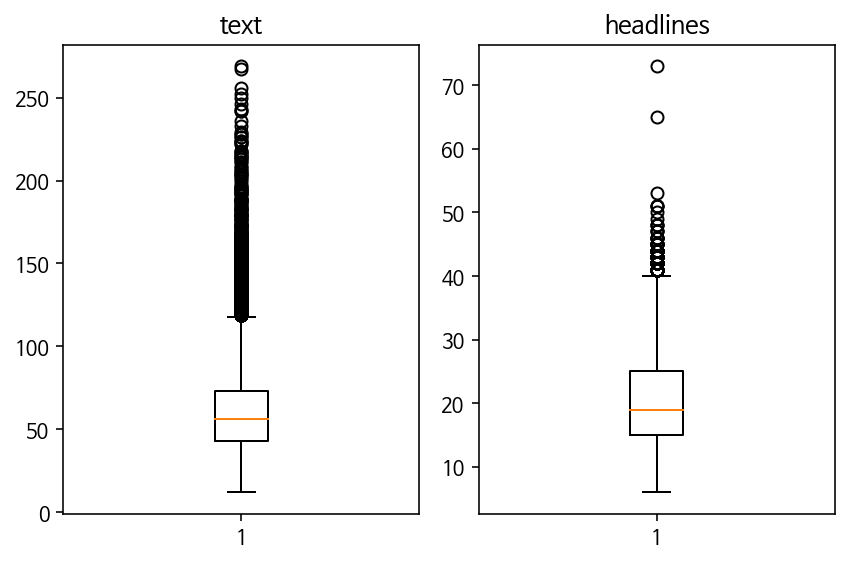

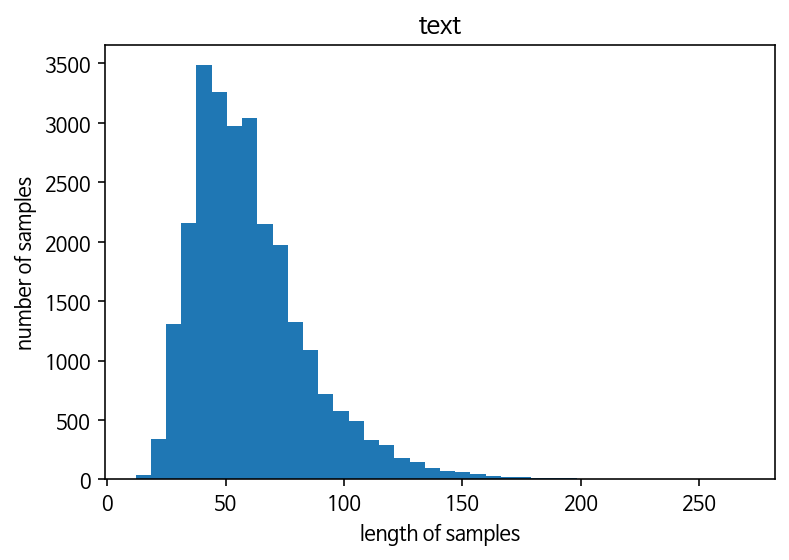

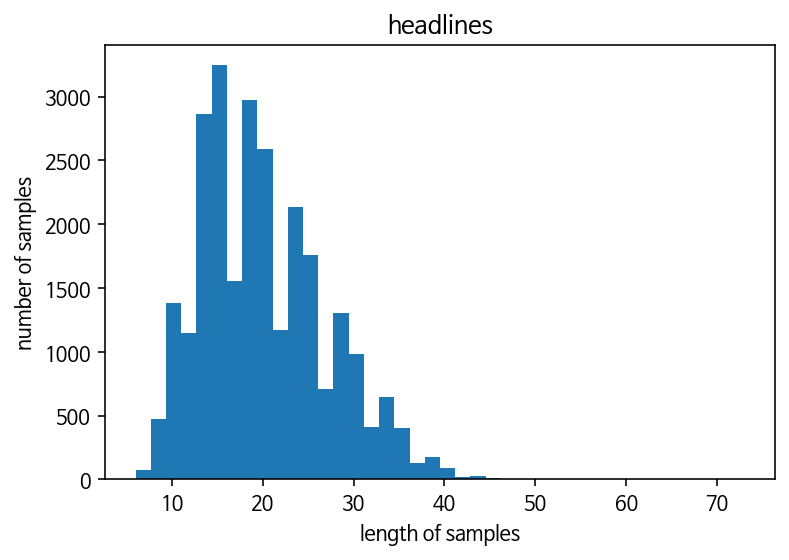

카테고리 :  행사
텍스트의 최소 길이 : 10
텍스트의 최대 길이 : 445
텍스트의 평균 길이 : 60.383447370887616
헤드라인의 최소 길이 : 5
헤드라인의 최대 길이 : 55
헤드라인의 평균 길이 : 19.75813103383635


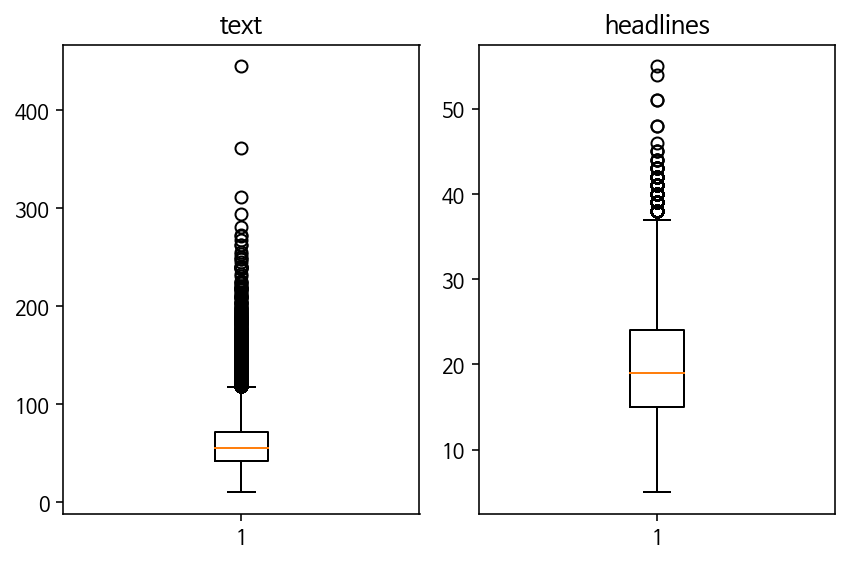

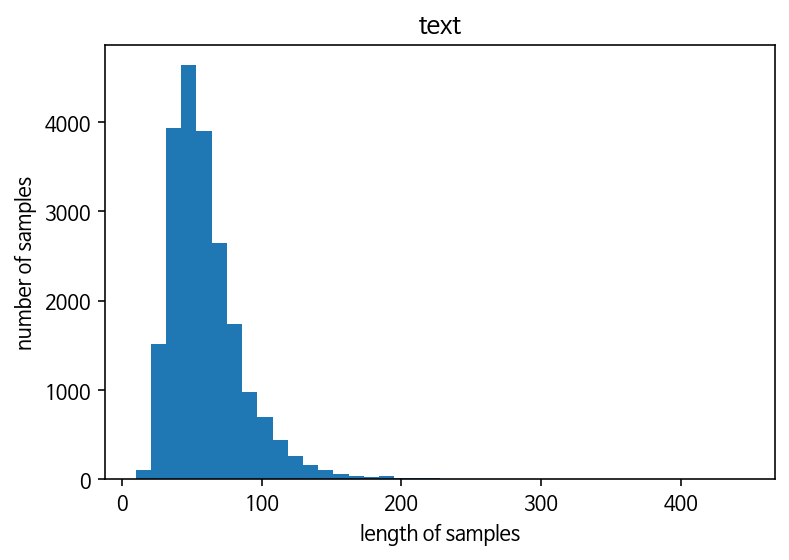

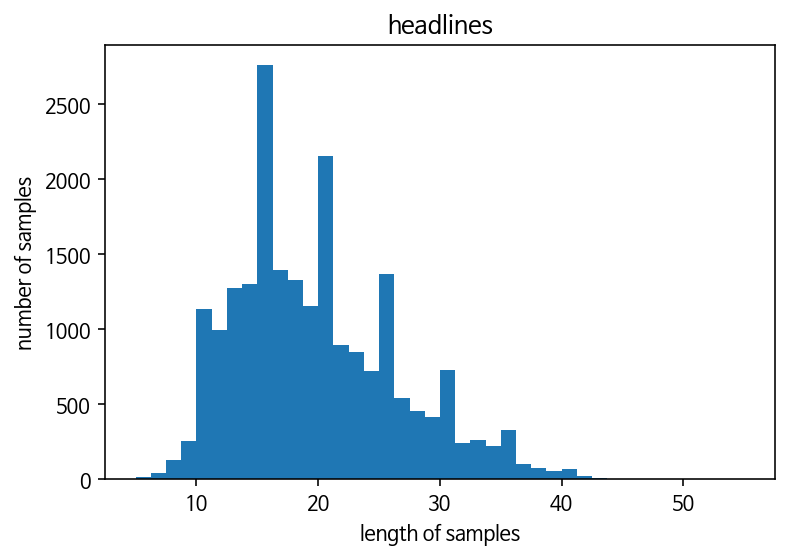

카테고리 :  일과 직업
텍스트의 최소 길이 : 10
텍스트의 최대 길이 : 849
텍스트의 평균 길이 : 69.06461719208929
헤드라인의 최소 길이 : 5
헤드라인의 최대 길이 : 66
헤드라인의 평균 길이 : 21.188271000587427


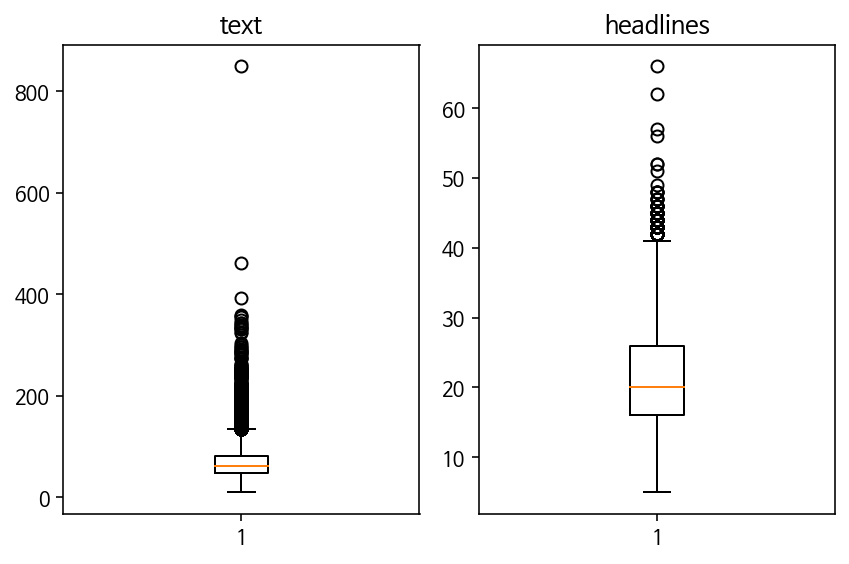

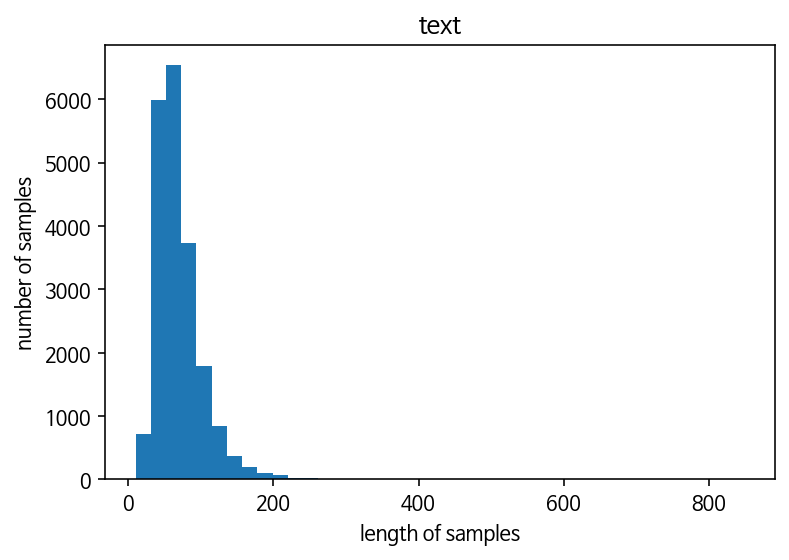

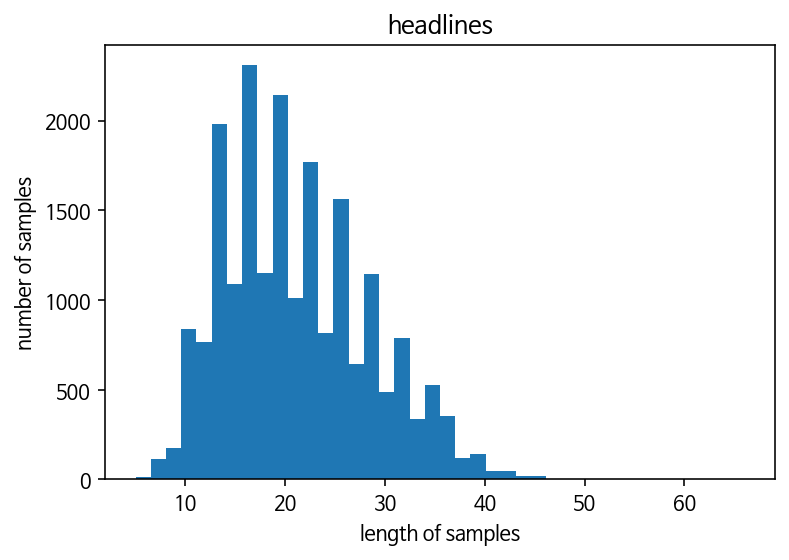

카테고리 :  미용과 건강
텍스트의 최소 길이 : 16
텍스트의 최대 길이 : 408
텍스트의 평균 길이 : 63.76009139375476
헤드라인의 최소 길이 : 5
헤드라인의 최대 길이 : 77
헤드라인의 평균 길이 : 20.58673618841174


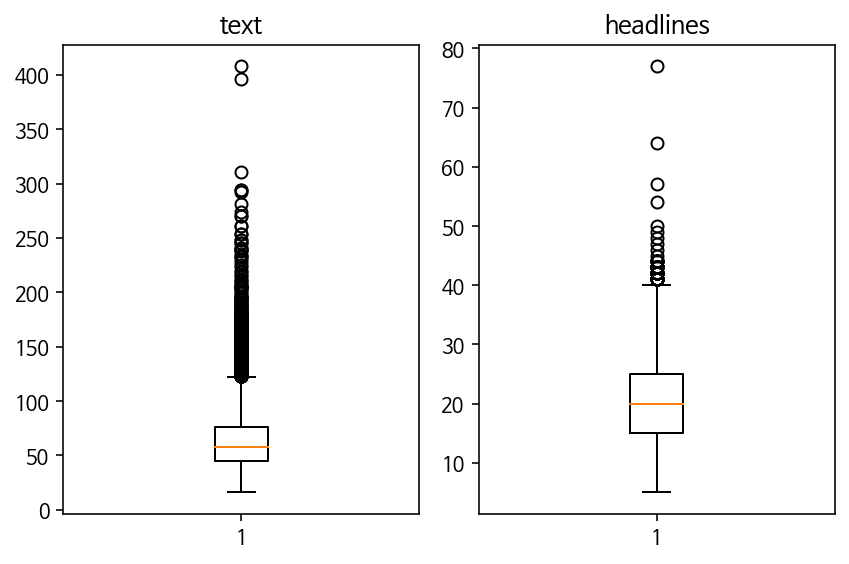

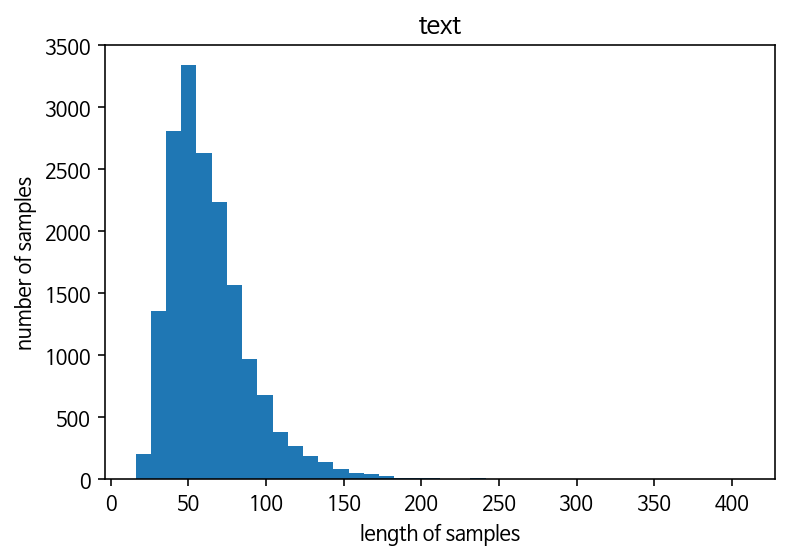

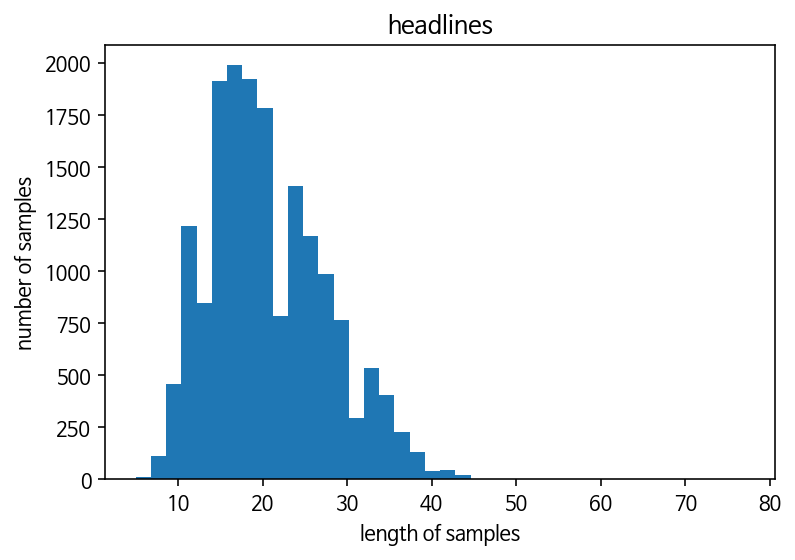

카테고리 :  시사/교육
텍스트의 최소 길이 : 14
텍스트의 최대 길이 : 500
텍스트의 평균 길이 : 64.67467032548213
헤드라인의 최소 길이 : 6
헤드라인의 최대 길이 : 58
헤드라인의 평균 길이 : 20.788246055339584


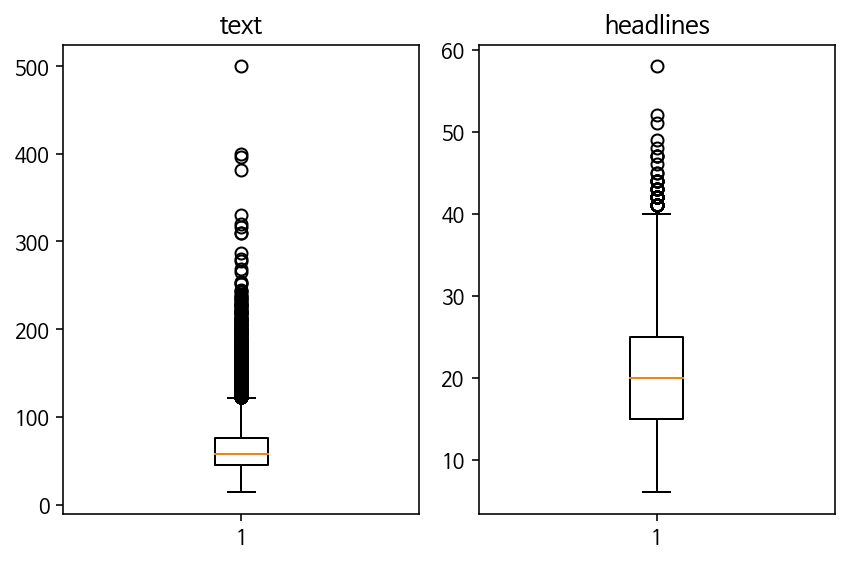

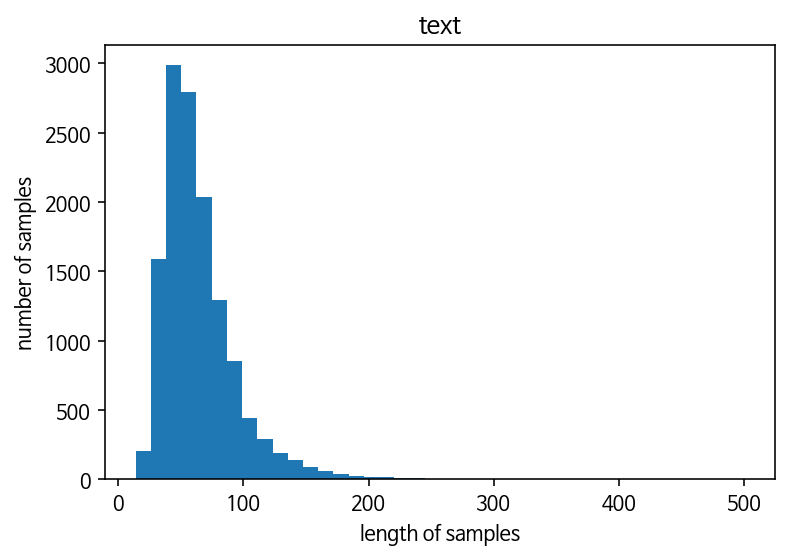

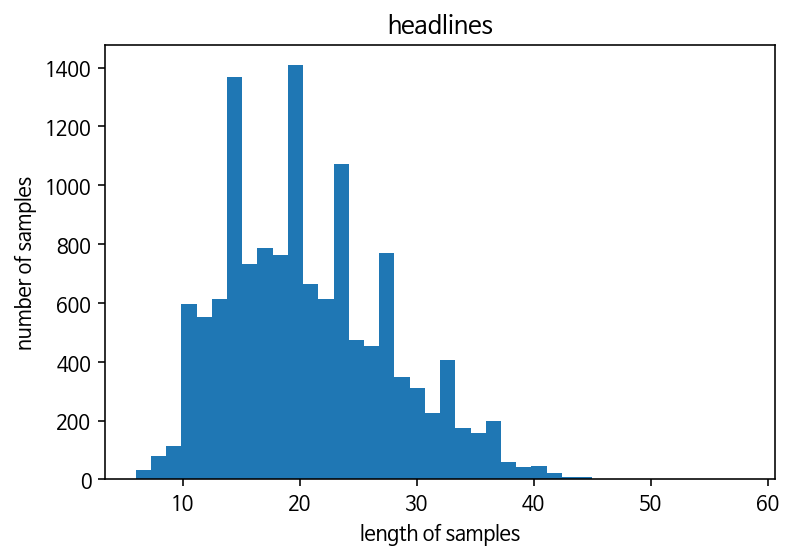

In [62]:
# 카테고리별 문장 길이 출력 (전처리 전)
for cate in Categori:
    print('카테고리 : ',cate)
    sentence_len(train, cate)

In [ ]:
# Category별 DataFrame을 출력

Categori = ['개인 및 관계', '주거와 생활', '여가 생활', '식음료', '상거래(쇼핑)', '행사', 
            '일과 직업', '미용과 건강', '시사/교육']

def categori_ext(data):
    df = pd.DataFrame()
    for c in Categori:
        df = pd.concat([df, data[data['Category'] == c].sample(frac = 0.5)], axis = 0)
        df.reset_index(inplace=True, drop=True)
    return df

#### 4. 라벨링된 데이터 확인
- 이름, 주소, 사진 등은 사전에 라벨링이 되어있기때문에 전체 data에서 얼마나 차지하고 있는지 확인해볼필요가있다.
- LBL dataset에서는 라벨링이 삭제됨

In [ ]:
# special_words List 생성
# special_words는 한국어 대화 요약에서 범주별 레이블링을 참고하여 작성하였다.
special_words = [
    "#@주소#",
    "#@이모티콘#",
    "#@이름#",
    "#@URL#",
    "#@소속#",
    "#@기타#",
    "#@전번#",
    "#@계정#",
    "#@url#",
    "#@번호#",
    "#@금융#",
    "#@신원#",
    "#@장소#",
    "#@시스템#사진#",
    "#@시스템#동영상#",
    "#@시스템#기타#",
    "#@시스템#검색#",
    "#@시스템#지도#",
    "#@시스템#삭제#",
    "#@시스템#파일#",
    "#@시스템#송금#",
    "#@시스템#",]

In [ ]:
special_words_df = pd.DataFrame()

In [ ]:
special_words_df

In [ ]:
# 전체 데이터에서 special_words가 차지하는 개수 확인
for label in special_words:
    special_words_df = (train[train['Text'].str.contains(label)])
    special_words_df

In [ ]:
special_words_df.reset_index(inplace = True, drop = True)

In [ ]:
special_words_df

In [ ]:
train['Text'].iloc[52]

In [29]:
train[train['Text'].str.contains(r'[#@]+[가-힣A-Za-z#]+')]

,Id,Text,Summary,Category


In [17]:
train[train['Text'].str.contains(r'[#@]+[a-z#]+')]

,Id,Text,Summary,Category


#### 5. emoji가 포함된 data 확인
- linebyline dataset에서는 이모지가 삭제됨

In [ ]:
!pip install emoji

In [ ]:
import emoji